In [3]:
import numba

import datetime
import pandas as pd
import numpy as np
import pandas_profiling
import sys
import os

import time
from datetime import date
from datetime import timedelta
from datetime import datetime

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import neighbors
from sklearn.neighbors import NearestNeighbors
from sklearn.model_selection import train_test_split
from sklearn.neighbors import RadiusNeighborsRegressor
from sklearn.neighbors import KNeighborsRegressor
from scipy import stats
import sklearn.metrics
from random import randrange
from itertools import chain
import random

from sklearn.datasets import fetch_mldata
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(font_scale=2)

pd.set_option('display.max_columns', 600)
pd.set_option('display.max_rows', 600)

In [2]:
df = pd.read_csv('HORSES_AIDAN.csv')

df = pd.concat([df,pd.get_dummies(df.HORSE_RESULT)], axis = 1)

C:\Users\ivan\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (546) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
df.head()

RACE_TRACK  MARKETID  SELECTIONID       RUNNER_NAME RACE_START_TIME  \
0       CHEP  1.150829      6395134  MOSS ON THE MILL       07-NOV-18   
1       CHEP  1.150829      8902700       DEADLY MOVE       07-NOV-18   
2       NOTT  1.150827     10094821     GRACIOUS JOHN       07-NOV-18   
3       NOTT  1.150827     11030704     COPPER KNIGHT       07-NOV-18   
4       NOTT  1.150827     12819184   KICK ON KICK ON       07-NOV-18   

  LIVE_RACE_STATUS  MEETING_ID      RACE_NAME  RACE_DISTANCE RACE_TYPE  \
0             OPEN  28996908.0  2M7F HCAP CHS            2.7  HCAP CHS   
1             OPEN  28996908.0  2M7F HCAP CHS            2.7  HCAP CHS   
2             OPEN  28996891.0        5F HCAP            0.5      HCAP   
3             OPEN  28996891.0        5F HCAP            0.5      HCAP   
4             OPEN  28996891.0        5F HCAP            0.5      HCAP   

        RACE_ID  RACE_STATUS  DAYS_SINCE_LAST_RUN SEX_TYPE  AGE  \
0  2.899691e+07          NaN                124.0        G  NaN   
1  2.899691e+07          NaN                 74.0        G  NaN   
2  2.899689e+07          NaN                 29.0        G  NaN   
3  2.899689e+07          NaN                 11.0        G  NaN   
4  2.899689e+07          NaN                 29.0        C  NaN   

   SORT_PRIORITY       JOCKEY_NAME  TRAINER_NAME  \
0            6.0   CIARAN GETHINGS    TOM GEORGE   
1            8.0       JAMES BOWEN   PETER BOWEN   
2            5.0  KATHERINE BEGLEY   DAVID EVANS   
3            3.0      PAUL HANAGAN  TIM EASTERBY   
4            2.0        ADAM KIRBY     CLIVE COX   

                          OWNER_NAME HORSE_FORM LAST_RACE SECOND_LAST_RACE  \
0                      MR R. CORNOCK     6UP83P         P                3   
1                   MR ROY SWINBURNE     8P34P5         5                P   
2                   MR TERRY REFFELL     352077         7                7   
3  VENTURA RACING (COPPER) & PARTNER     050144         4                4   
4                PAUL & CLARE ROONEY     211843         3                4   

  LAST_TWO_RACES  WEIGHT_VALUE WEIGHT_UNITS  JOCKEY_CLAIM  \
0             3P         163.0       POUNDS           NaN   
1             P5         153.0       POUNDS           NaN   
2             77         126.0       POUNDS           7.0   
3             44         127.0       POUNDS           NaN   
4             43         126.0       POUNDS           NaN   

                        WEARING  OFFICIAL_RATING  FORECASTPRICE_DENOMINATOR  \
0                   CHEEKPIECES            112.0                        1.0   
1  CHEEKPIECES AND TONGUE STRAP            102.0                        1.0   
2                           NaN             96.0                        1.0   
3                  TONGUE STRAP             97.0                        2.0   
4                           NaN             95.0                        1.0   

   FORECASTPRICE_NUMERATOR       SIRE_NAME  SIRE_YEAR_BORN SIRE_BRED  \
0                     16.0        OVERBURY          1991.0       IRE   
1                     22.0        SCORPION          2002.0       IRE   
2                     14.0     BALTIC KING          2000.0        UK   
3                     13.0  SIR PRANCEALOT          2010.0       IRE   
4                      4.0    SWISS SPIRIT          2009.0        UK   

            DAM_NAME DAM_BRED  DAM_YEAR_BORN  DAMSIRE_NAME  DAMSIRE_YEAR_BORN  \
0       MIMIS BONNET       FR         2003.0  BONNET ROUGE             1997.0   
1  SOUNDS ATTRACTIVE      IRE         2002.0   RUDIMENTARY             1988.0   
2          DORN HILL       UK         2002.0        LUJAIN             1996.0   
3       MYSTIC DREAM       UK         2008.0   OASIS DREAM             2000.0   
4            CATMINT       UK         2000.0       PICCOLO             1991.0   

  DAMSIRE_BRED  STALL_DRAW  ADJUSTED_RATING  CLOTH_NUMBER_ALPHA  \
0           FR         NaN              0.0                 2.0   
1          USA         NaN           

In [66]:
df = df.sort_values(by='MARKETID')#.head(15)

In [67]:
df.sort_values(by='MARKETID').head(15)

RACE_TRACK  MARKETID  SELECTIONID       RUNNER_NAME RACE_START_TIME  \
5423        WOLV  1.147679     10635121      MOSSYS LODGE       08-SEP-18   
16406       WOLV  1.147679      7302354             TOOFI       08-SEP-18   
4516        WOLV  1.147679     10095487         TIGERWOLF       08-SEP-18   
4517        WOLV  1.147679     13295485       RAVENS RAFT       08-SEP-18   
5398        WOLV  1.147679      6516194   HUNTSMANS CLOSE       08-SEP-18   
5948        WOLV  1.147679     12983948      YOGIYOGIYOGI       08-SEP-18   
7992        WOLV  1.147679     17949278  RAGGS AND RICHES       08-SEP-18   
8020        WOLV  1.147679       349633           TUSCANY       08-SEP-18   
19094       WOLV  1.147679     20507464    KING OF NAPLES       08-SEP-18   
14676       WOLV  1.147679      6637335       RENE MATHIS       08-SEP-18   
15858       WOLV  1.147679     12943006     PESKY WABBITT       08-SEP-18   
12969       WOLV  1.147679     11570473             VIBES       08-SEP-18   
15459       WOLV  1.147679     19044455            BLYTON       08-SEP-18   
4518        WOLV  1.147679     18662913     MELGATE MAGIC       08-SEP-18   
16741       WOLV  1.147679     18227615             KADIZ       08-SEP-18   

      LIVE_RACE_STATUS  MEETING_ID      RACE_NAME  RACE_DISTANCE   RACE_TYPE  \
5423              OPEN  28889952.0  7F CLAIM STKS            0.7  CLAIM STKS   
16406             OPEN  28889952.0  7F CLAIM STKS            0.7  CLAIM STKS   
4516              OPEN  28889952.0  7F CLAIM STKS            0.7  CLAIM STKS   
4517              OPEN  28889952.0  7F CLAIM STKS            0.7  CLAIM STKS   
5398              OPEN  28889952.0  7F CLAIM STKS            0.7  CLAIM STKS   
5948              OPEN  28889952.0  7F CLAIM STKS            0.7  CLAIM STKS   
7992              OPEN  28889952.0  7F CLAIM STKS            0.7  CLAIM STKS   
8020              OPEN  28889952.0  7F CLAIM STKS            0.7  CLAIM STKS   
19094             OPEN  28889952.0  7F CLAIM STKS            0.7  CLAIM STKS   
14676             OPEN  28889952.0  7F CLAIM STKS            0.7  CLAIM STKS   
15858             OPEN  28889952.0  7F CLAIM STKS            0.7  CLAIM STKS   
12969             OPEN  28889952.0  7F CLAIM STKS            0.7  CLAIM STKS   
15459             OPEN  28889952.0    5F NOV STKS            0.5    NOV STKS   
4518              OPEN  28889952.0    5F NOV STKS            0.5    NOV STKS   
16741             OPEN  28889952.0    5F NOV STKS            0.5    NOV STKS   

            RACE_ID  RACE_STATUS  DAYS_SINCE_LAST_RUN SEX_TYPE  AGE  \
5423   2.888995e+07          NaN                 46.0        M  NaN   
16406  2.888995e+07          NaN                 25.0        G  NaN   
4516   2.888995e+07          NaN                 29.0        G  NaN   
4517   2.888995e+07          NaN                  7.0        F  NaN   
5398   2.888995e+07          NaN                 10.0        G  NaN   
5948   2.888995e+07          NaN                 31.0        F  NaN   
7992   2.888995e+07          NaN                 10.0        F  NaN   
8020   2.888995e+07          NaN                 35.0        G  NaN   
19094  2.888995e+07          NaN                169.0        G  NaN   
14676  2.888995e+07          NaN                 34.0        G  NaN   
15858  2.888995e+07          NaN                 16.0        G  NaN   
12969  2.888995e+07          NaN                 10.0        G  NaN   
15459  2.888995e+07          NaN                 17.0        C  NaN   
4518   2.888995e+07          NaN                 20.0        G  NaN   
16741  2.888995e+07          NaN                 37.0        F  NaN   

       SORT_PRIORITY        JOCKEY_NAME        TRAINER_NAME  \
5423            12.0         PAULA MUIR     REBECCA MENZIES   
16406            2.0     ROBERT WINSTON         JOHN BUTLER   
4516             3.0         EOIN WALSH    DANIEL LOUGHNANE   
4517            11.0        JIMMY QUINN     MICHAEL APPLEBY   
5398             9.0     STEVIE DONOHOE 

In [68]:
market_list = df.groupby('MARKETID').count().index.tolist()

In [89]:
feat = 'AMT_BACKED_1_MIN_OUT'

met_list = []
for m_ID in market_list:

    fav_price = df[df.MARKETID == m_ID][feat].min()
    met_list.append((df[df.MARKETID == m_ID][feat]/fav_price).tolist())

met_list = list(chain.from_iterable(met_list))

df[feat + '_NORM'] = met_list

In [90]:
feat = 'AMT_BACKED_10_MINS_OUT'

met_list = []
for m_ID in market_list:

    fav_price = df[df.MARKETID == m_ID][feat].min()
    met_list.append((df[df.MARKETID == m_ID][feat]/fav_price).tolist())

met_list = list(chain.from_iterable(met_list))

df[feat + '_NORM'] = met_list

In [91]:
feat = 'AMT_BACKED_20_MINS_OUT'

met_list = []
for m_ID in market_list:

    fav_price = df[df.MARKETID == m_ID][feat].min()
    met_list.append((df[df.MARKETID == m_ID][feat]/fav_price).tolist())

met_list = list(chain.from_iterable(met_list))

df[feat + '_NORM'] = met_list

In [92]:
feat = 'AMT_BACKED_2_SECS_OUT'

met_list = []
for m_ID in market_list:

    fav_price = df[df.MARKETID == m_ID][feat].min()
    met_list.append((df[df.MARKETID == m_ID][feat]/fav_price).tolist())

met_list = list(chain.from_iterable(met_list))

df[feat + '_NORM'] = met_list

In [93]:
feat = 'AMT_BACKED_30_MINS_OUT'

met_list = []
for m_ID in market_list:

    fav_price = df[df.MARKETID == m_ID][feat].min()
    met_list.append((df[df.MARKETID == m_ID][feat]/fav_price).tolist())

met_list = list(chain.from_iterable(met_list))

df[feat + '_NORM'] = met_list

In [94]:
feat = 'AMT_BACKED_40_MINS_OUT'

met_list = []
for m_ID in market_list:

    fav_price = df[df.MARKETID == m_ID][feat].min()
    met_list.append((df[df.MARKETID == m_ID][feat]/fav_price).tolist())

met_list = list(chain.from_iterable(met_list))

df[feat + '_NORM'] = met_list

In [95]:
feat = 'AMT_BACKED_45_MINS_OUT'

met_list = []
for m_ID in market_list:

    fav_price = df[df.MARKETID == m_ID][feat].min()
    met_list.append((df[df.MARKETID == m_ID][feat]/fav_price).tolist())

met_list = list(chain.from_iterable(met_list))

df[feat + '_NORM'] = met_list

In [96]:
feat = 'AMT_BACKED_5_MINS_OUT'

met_list = []
for m_ID in market_list:

    fav_price = df[df.MARKETID == m_ID][feat].min()
    met_list.append((df[df.MARKETID == m_ID][feat]/fav_price).tolist())

met_list = list(chain.from_iterable(met_list))

df[feat + '_NORM'] = met_list

In [97]:
feat = 'AMT_BACKED_60_MINS_OUT'

met_list = []
for m_ID in market_list:

    fav_price = df[df.MARKETID == m_ID][feat].min()
    met_list.append((df[df.MARKETID == m_ID][feat]/fav_price).tolist())

met_list = list(chain.from_iterable(met_list))

df[feat + '_NORM'] = met_list

In [100]:
df.to_csv('HORSES_AIDAN.csv')

In [3]:
sorted(df.columns.tolist())

['ADJUSTED_RATING',
 'AGE',
 'AMT_BACKED_10_MINS_OUT',
 'AMT_BACKED_1_MIN_OUT',
 'AMT_BACKED_20_MINS_OUT',
 'AMT_BACKED_2_SECS_OUT',
 'AMT_BACKED_30_MINS_OUT',
 'AMT_BACKED_40_MINS_OUT',
 'AMT_BACKED_45_MINS_OUT',
 'AMT_BACKED_5_MINS_OUT',
 'AMT_BACKED_60_MINS_OUT',
 'BACKPRICE',
 'BRED',
 'CLOTH_NUMBER',
 'CLOTH_NUMBER_ALPHA',
 'COLOURS_DESCRIPTION',
 'COLOUR_TYPE',
 'DAMSIRE_BRED',
 'DAMSIRE_NAME',
 'DAMSIRE_YEAR_BORN',
 'DAM_BRED',
 'DAM_NAME',
 'DAM_YEAR_BORN',
 'DAYS_SINCE_LAST_RUN',
 'EXPERIENCE',
 'EXPERIENCE_RANKING',
 'FORECASTPRICE_DENOMINATOR',
 'FORECASTPRICE_NUMERATOR',
 'HANDICAP',
 'HORSE_FORM',
 'HORSE_RANKING_BY_PRICE',
 'HORSE_RESULT',
 'JOCKEY_CLAIM',
 'JOCKEY_NAME',
 'LASTMATCHTIME',
 'LASTPRICETRADED',
 'LAST_RACE',
 'LAST_TWO_RACES',
 'LAYPRICE',
 'LIVE_RACE_STATUS',
 'LOSER',
 'MARKETID',
 'MEETING_ID',
 'NUMBEROFACTIVERUNNERS',
 'NUMBEROFRUNNERS',
 'NUMBEROFWINNERS',
 'OFFICIAL_RATING',
 'OFFICIAL_RATING_RANKING',
 'OWNER_NAME',
 'PCT_AMT_BACKED_10_MINS_OUT',
 '

In [98]:
cols = ['ADJUSTED_RATING', 'AGE', 'AMT_BACKED_10_MINS_OUT', 'AMT_BACKED_1_MIN_OUT', 'AMT_BACKED_20_MINS_OUT',
 'AMT_BACKED_2_SECS_OUT', 'AMT_BACKED_30_MINS_OUT', 'AMT_BACKED_40_MINS_OUT', 'AMT_BACKED_45_MINS_OUT',
 'AMT_BACKED_5_MINS_OUT', 'AMT_BACKED_60_MINS_OUT', 'BACKPRICE', 'DAYS_SINCE_LAST_RUN', 'EXPERIENCE', 'EXPERIENCE_RANKING',
 'FORECASTPRICE_DENOMINATOR', 'FORECASTPRICE_NUMERATOR', 'HANDICAP', 'HORSE_RANKING_BY_PRICE', 'HORSE_RESULT', 'JOCKEY_CLAIM',
 'LASTPRICETRADED', 'LOSER', 'NUMBEROFACTIVERUNNERS', 'NUMBEROFRUNNERS', 'OFFICIAL_RATING', 'OFFICIAL_RATING_RANKING',
 'PMS_RANKING', 'PRICE_10_MINS_OUT', 'PRICE_10_MINS_OUT_RANKING',
 'PRICE_1_MIN_OUT', 'PRICE_1_MIN_OUT_RANKING', 'PRICE_20_MINS_OUT', 'PRICE_20_MINS_OUT_RANKING', 'PRICE_2_SECS_OUT',
 'PRICE_2_SECS_OUT_RANKING', 'PRICE_30_MINS_OUT', 'PRICE_30_MINS_OUT_RANKING', 'PRICE_40_MINS_OUT', 'PRICE_40_MINS_OUT_RANKING',
 'PRICE_45_MINS_OUT', 'PRICE_45_MINS_OUT_RANKING', 'PRICE_5_MINS_OUT', 'PRICE_5_MINS_OUT_RANKING', 'PRICE_60_MINS_OUT',
 'PRICE_60_MINS_OUT_RANKING', 'PRICE_MOVEMENT_SIGNIFICANCE', 'PRICE_RANKING_AT_RACE_START', 'PRODUCT_OF_ALL_RANKINGS',
 'PROD_OF_ALL_RANKINGS_RANKING', 'PROD_OF_NUM_SAMPLES_RANKINGS', 'PROD_SAMPLES_RANKINGS_RANKING', 'PROPENSITY',
 'PROPENSITY_RANKING', 'RACE_DISTANCE', 'REMOVED', 'SCORE_OF_RANKINGS', 'SCORE_OF_RANKINGS_RANKING', 'SECOND_LAST_RACE',
 'SEX_TYPE', 'SORT_PRIORITY', 'STALL_DRAW', 'SUM_OF_ALL_RANKINGS', 'SUM_OF_ALL_RANKINGS_RANKING',
 'SUM_OF_NUM_SAMPLES_RANKINGS', 'SUM_SAMPLES_RANKINGS_RANKING', 'TOTALAVAILABLE', 'TOTAL_MATCHED_ON_RACE',
 'TOTAL_MATCHED_ON_RUNNER', 'TOTAL_WLR', 'TRAINER_NAME', 'WEARING', 'WEIGHT_VALUE', 'WINNER',
 'WLR_RANKING', 'WLR_RANKINGS_RANKING', 'WLR_RANKINGS_TOTAL', 'NORM_BACKPRICE', 'AMT_BACKED_10_MINS_OUT_NORM',
 'AMT_BACKED_1_MIN_OUT_NORM', 'AMT_BACKED_20_MINS_OUT_NORM', 'AMT_BACKED_2_SECS_OUT_NORM', 'AMT_BACKED_30_MINS_OUT_NORM', 
 'AMT_BACKED_40_MINS_OUT_NORM', 'AMT_BACKED_45_MINS_OUT_NORM', 'AMT_BACKED_5_MINS_OUT_NORM', 'AMT_BACKED_60_MINS_OUT_NORM']

In [101]:
corrs = df[cols][df[cols].columns[1:]].corr()['WINNER'][:]

corrs.sort_values(ascending=False)

WINNER                           1.000000
TOTAL_MATCHED_ON_RUNNER          0.270244
AMT_BACKED_2_SECS_OUT            0.267867
AMT_BACKED_1_MIN_OUT             0.252296
AMT_BACKED_5_MINS_OUT            0.183561
TOTAL_WLR                        0.183001
FORECASTPRICE_DENOMINATOR        0.179032
AMT_BACKED_30_MINS_OUT           0.119812
AMT_BACKED_20_MINS_OUT           0.113555
AMT_BACKED_40_MINS_OUT           0.110039
AMT_BACKED_45_MINS_OUT           0.107867
AMT_BACKED_60_MINS_OUT           0.102189
AMT_BACKED_10_MINS_OUT           0.092368
OFFICIAL_RATING                  0.056505
AMT_BACKED_2_SECS_OUT_NORM       0.051015
AMT_BACKED_1_MIN_OUT_NORM        0.050056
AMT_BACKED_5_MINS_OUT_NORM       0.046081
AMT_BACKED_10_MINS_OUT_NORM      0.040955
WEIGHT_VALUE                     0.034668
EXPERIENCE                       0.031308
AMT_BACKED_20_MINS_OUT_NORM      0.028294
AMT_BACKED_30_MINS_OUT_NORM      0.026029
AMT_BACKED_60_MINS_OUT_NORM      0.023194
AMT_BACKED_45_MINS_OUT_NORM      0

In [4]:
cols = ['ADJUSTED_RATING', 'AGE', 'AMT_BACKED_1_MIN_OUT', 
  'BACKPRICE', 'EXPERIENCE_RANKING', 'HANDICAP', 'HORSE_RANKING_BY_PRICE',
 'LASTPRICETRADED', 'LOSER', 'NUMBEROFACTIVERUNNERS', 'OFFICIAL_RATING', 'OFFICIAL_RATING_RANKING',
 'PMS_RANKING', 'PRICE_10_MINS_OUT', 'PRICE_10_MINS_OUT_RANKING',
 'PRICE_1_MIN_OUT', 'PRICE_1_MIN_OUT_RANKING', 'PRICE_MOVEMENT_SIGNIFICANCE', 'PRICE_RANKING_AT_RACE_START',
 'PROD_OF_ALL_RANKINGS_RANKING', 'PROD_OF_NUM_SAMPLES_RANKINGS', 'PROD_SAMPLES_RANKINGS_RANKING', 'PROPENSITY',
 'PROPENSITY_RANKING', 'SCORE_OF_RANKINGS', 'SCORE_OF_RANKINGS_RANKING',
 'SEX_TYPE', 'STALL_DRAW', 'SUM_OF_ALL_RANKINGS', 'SUM_OF_ALL_RANKINGS_RANKING',
 'TOTAL_MATCHED_ON_RUNNER', 'TOTAL_WLR', 'TRAINER_NAME', 'WEARING', 'WEIGHT_VALUE', 'WINNER',
 'WLR_RANKING', 'WLR_RANKINGS_TOTAL']

In [5]:
len(cols)

38

In [50]:
#df[cols].iloc[0:500].profile_report()

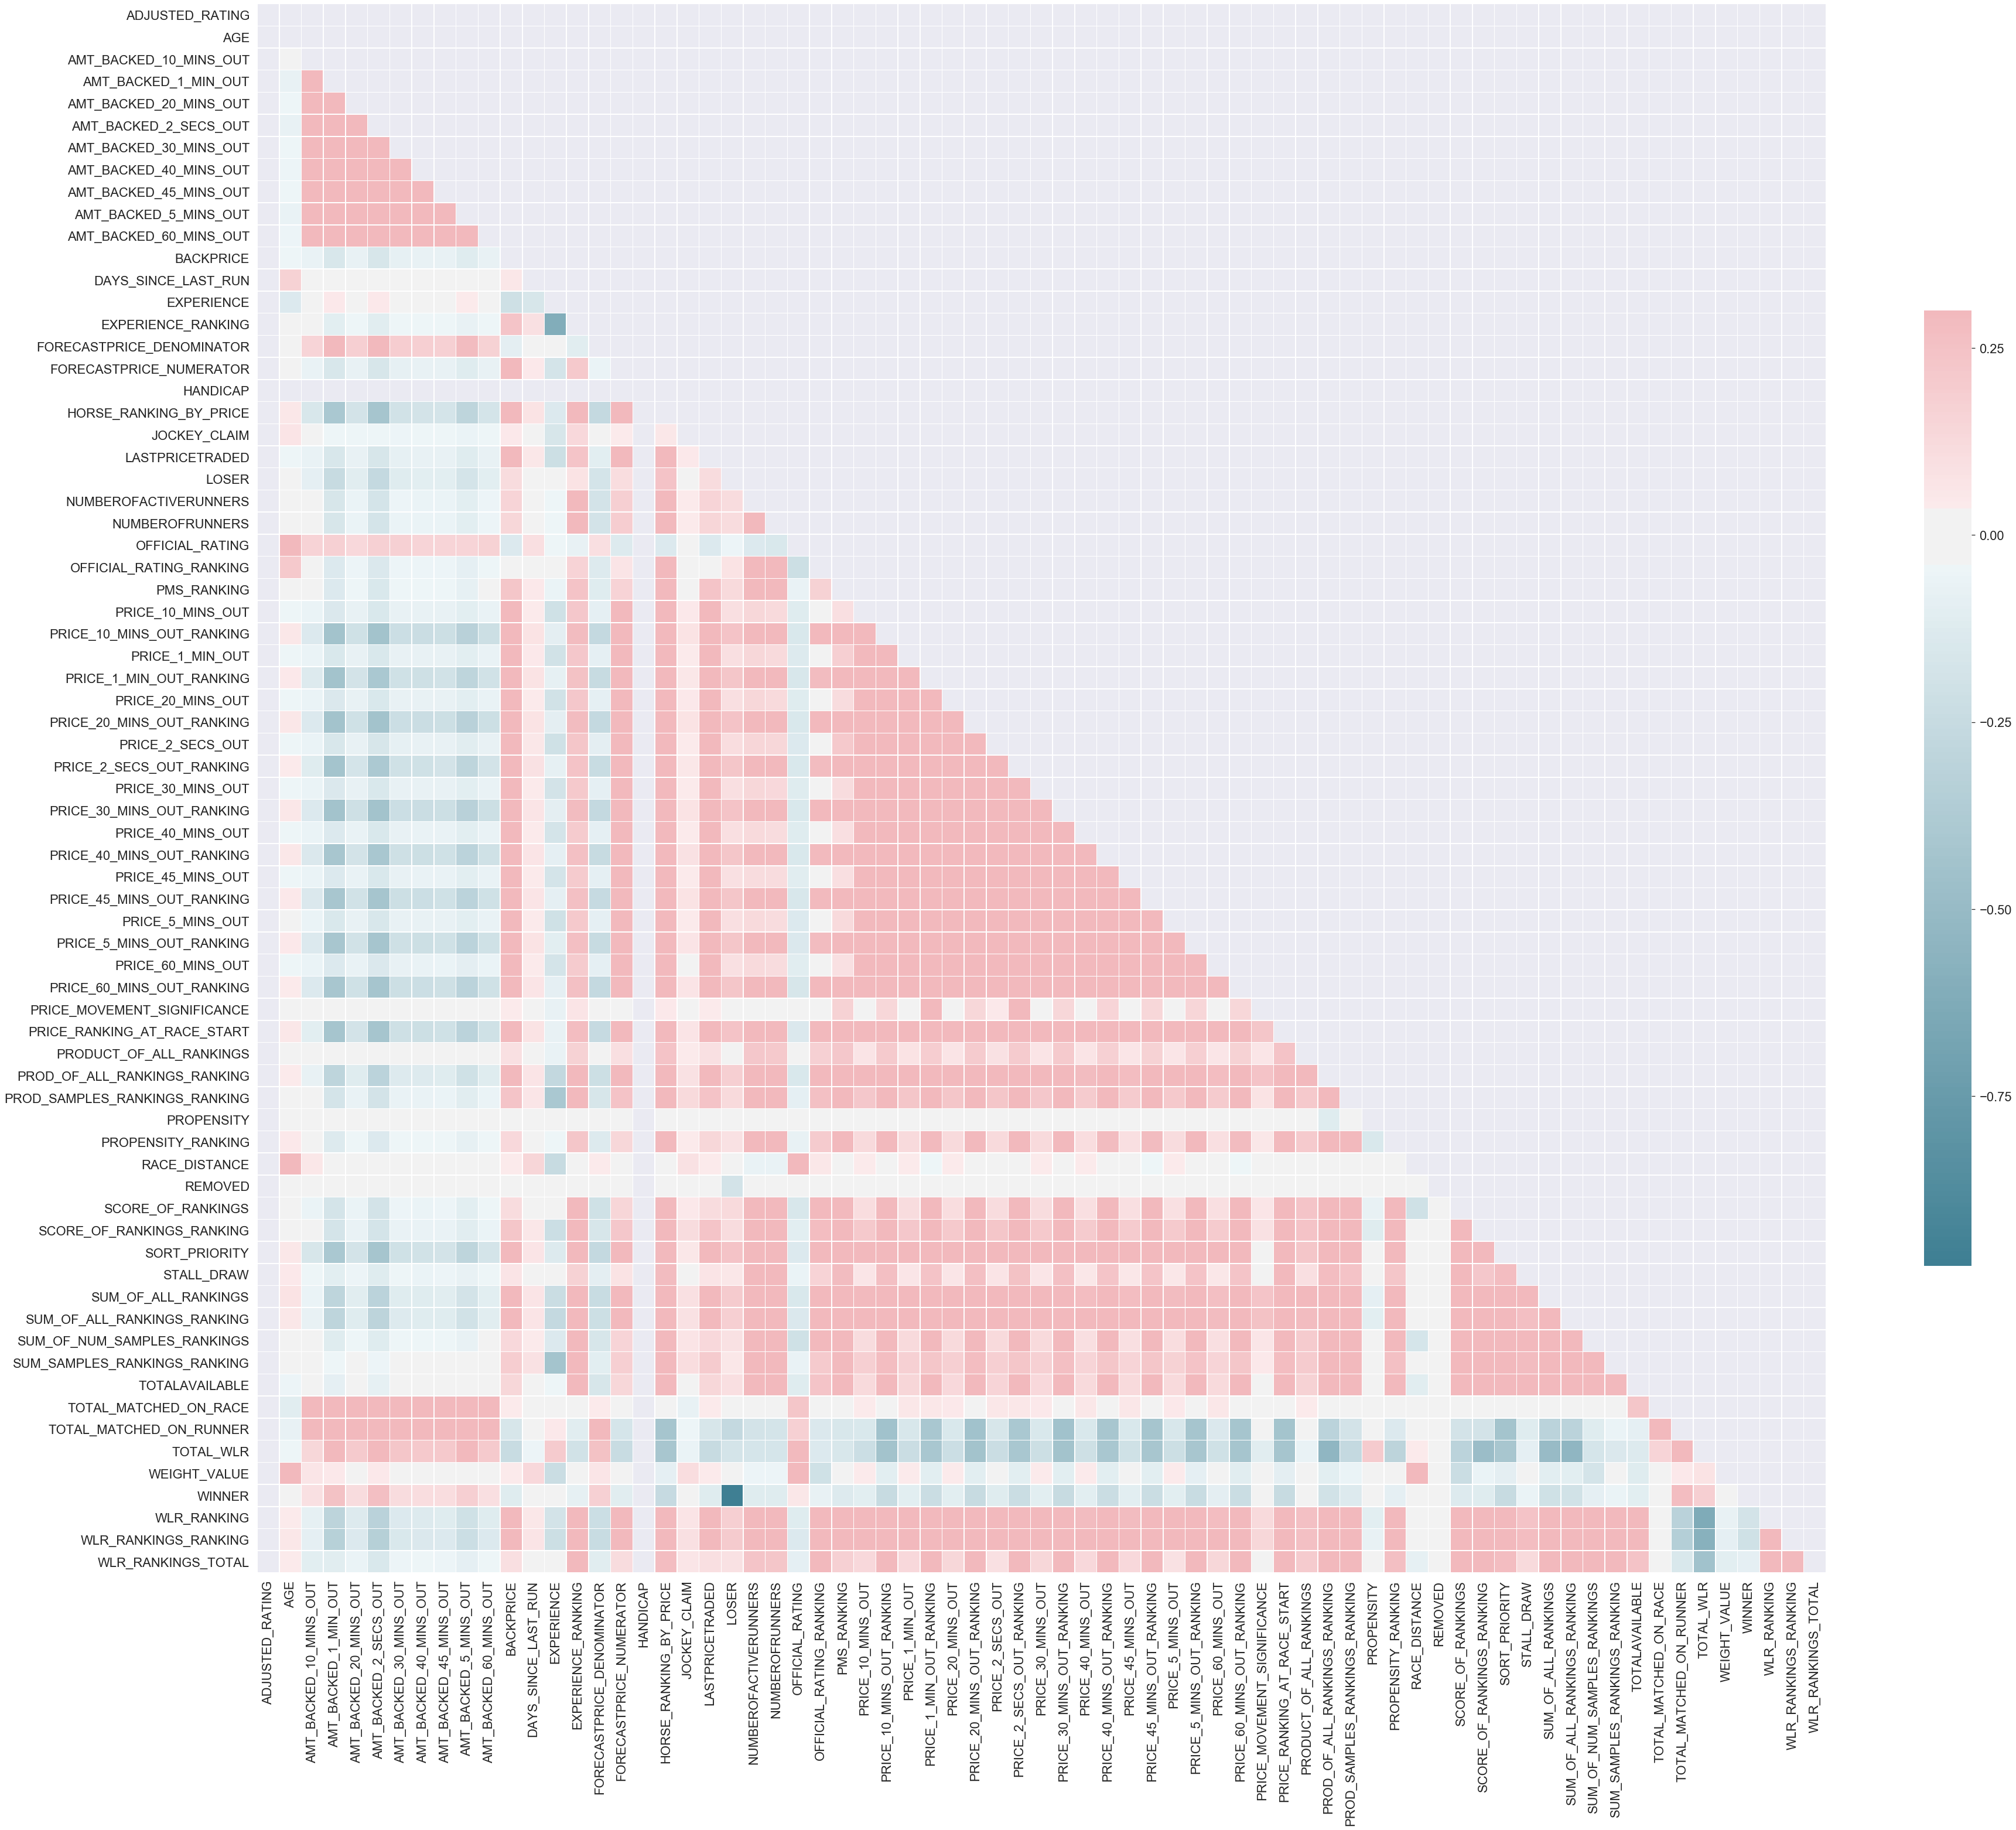

In [17]:
#corr = df[cols].corr()

# Generate a mask for the upper triangle
#mask = np.zeros_like(corr, dtype=np.bool)
#mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
#f, ax = plt.subplots(figsize=(60, 60))

# Generate a custom diverging colormap
#cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
#sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
#            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [19]:
corrs = df[cols][df[cols].columns[1:]].corr()['WINNER'][:]

corrs.sort_values(ascending=False)

In [4]:
df = pd.read_csv('HORSES_AIDAN.csv')
#df = pd.concat([df,pd.get_dummies(df.HORSE_RESULT)], axis = 1)

C:\Users\ivan\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (547) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
df['WINNER'] = (df['WINNER'].astype(int)*2)-1

iles = 8
bin_size = len(df)/iles

df = df.sort_values(by=['TOTAL_MATCHED_ON_RUNNER'], ascending = False)
df = df.reset_index()

df['rank_TOTAL_MATCHED_ON_RUNNER'] = df.index.values

df['binned_TOTAL_MATCHED_ON_RUNNER'] = pd.qcut(df['rank_TOTAL_MATCHED_ON_RUNNER'],iles)

prob_list = list(df.groupby('binned_TOTAL_MATCHED_ON_RUNNER').WINNER.sum()/bin_size)
batch_list = range(0,iles)

bin_list = list(df.groupby('binned_TOTAL_MATCHED_ON_RUNNER').WINNER.sum().index)

def win_prob(binned, price):
    return prob_list[bin_list.index(binned)]

# calculated as the change per euro to your a/c balance. 0 = no change to a/c.
# +(-)1 means you gain(lose) 1€ for every 1€ wagered
def EV_calc(binned, price):
    EV = prob_list[bin_list.index(binned)] * price
    return EV

#df['batch_prob'] = df.apply(lambda row: win_prob(row['binned'],row['BACKPRICE']), axis=1)

df['EV_TOTAL_MATCHED_ON_RUNNER'] = df.apply(lambda row: EV_calc(row['binned_TOTAL_MATCHED_ON_RUNNER'],row['BACKPRICE']), axis=1)

mean_EV_list = list(df.groupby('binned_TOTAL_MATCHED_ON_RUNNER').EV_TOTAL_MATCHED_ON_RUNNER.mean())

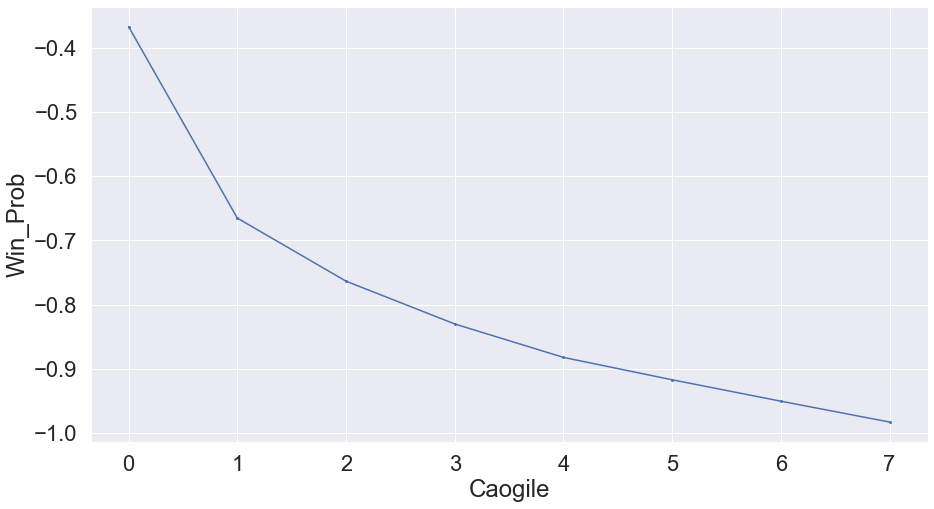

In [6]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 8, forward=True)
ax.plot(batch_list, prob_list,   '.-')
plt.rc('font', size=28)
plt.xlabel("Caogile")
plt.ylabel("Win_Prob")
#_ = plt.plot([0, len(batch_list)], [1, 1])


#plt.xlim(-800,500)
#plt.ylim(0,3000)

plt.grid(True)
plt.show()

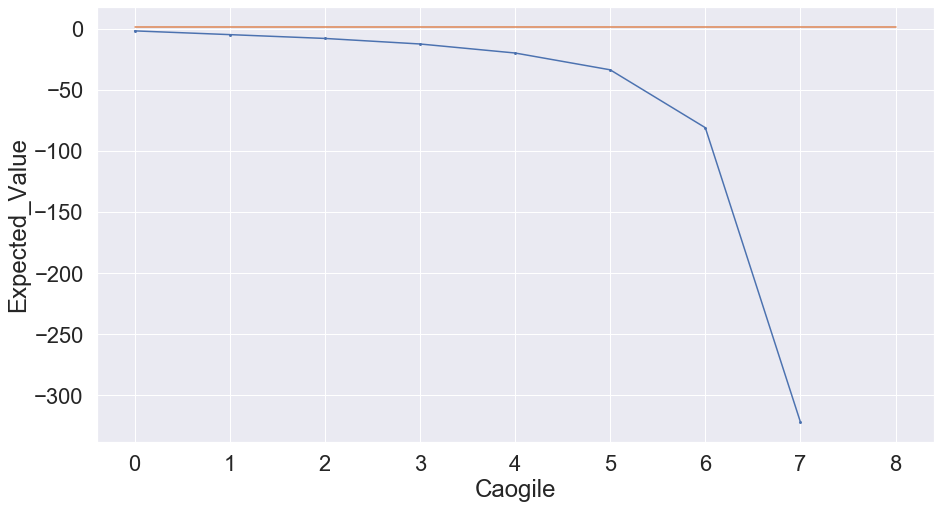

In [7]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 8, forward=True)
ax.plot(batch_list, mean_EV_list,   '.-')
plt.rc('font', size=28)
plt.xlabel("Caogile")
plt.ylabel("Expected_Value")
_ = plt.plot([0, len(batch_list)], [2, 2])


#plt.xlim(-800,500)
#plt.ylim(0,3000)

plt.grid(True)
plt.show()

In [8]:
df = df.sort_values(by=['AMT_BACKED_2_SECS_OUT'], ascending = False)
df = df.reset_index()

df['rank_AMT_BACKED_2_SECS_OUT'] = df.index.values

df['binned_AMT_BACKED_2_SECS_OUT'] = pd.qcut(df['rank_AMT_BACKED_2_SECS_OUT'],iles)

prob_list = list(df.groupby('binned_AMT_BACKED_2_SECS_OUT').WINNER.sum()/bin_size)
batch_list = range(0,iles)

bin_list = list(df.groupby('binned_AMT_BACKED_2_SECS_OUT').WINNER.sum().index)

#df[df.binned_AMT_BACKED_2_SECS_OUT == bin_list[0]]['EV_AMT_BACKED_2_SECS_OUT'] = prob_list[0] * df[df.binned_AMT_BACKED_2_SECS_OUT == bin_list[0]].BACKPRICE

def win_prob(binned, price):
    return prob_list[bin_list.index(binned)]

def EV_calc(binned, price):
    EV = prob_list[bin_list.index(binned)] * price
    return EV

#df['batch_prob'] = df.apply(lambda row: win_prob(row['binned_AMT_BACKED_2_SECS_OUT'],row['BACKPRICE']), axis=1)

df['EV_AMT_BACKED_2_SECS_OUT'] = df.apply(lambda row: EV_calc(row['binned_AMT_BACKED_2_SECS_OUT'],row['BACKPRICE']), axis=1)

mean_EV_list = list(df.groupby('binned_AMT_BACKED_2_SECS_OUT').EV_AMT_BACKED_2_SECS_OUT.mean())

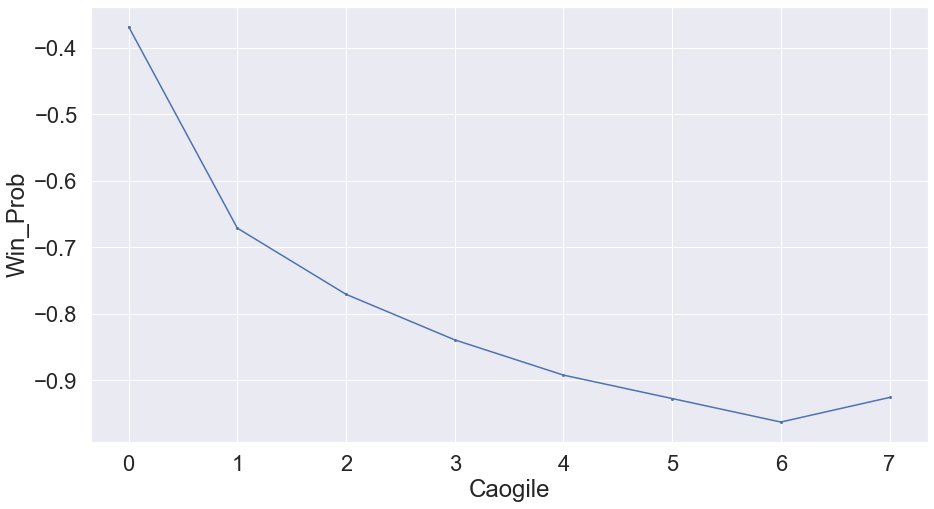

In [9]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 8, forward=True)
ax.plot(batch_list, prob_list,   '.-')
plt.rc('font', size=28)
plt.xlabel("Caogile")
plt.ylabel("Win_Prob")
#_ = plt.plot([0, len(batch_list)], [1, 1])


#plt.xlim(-800,500)
#plt.ylim(0,3000)

plt.grid(True)
plt.show()

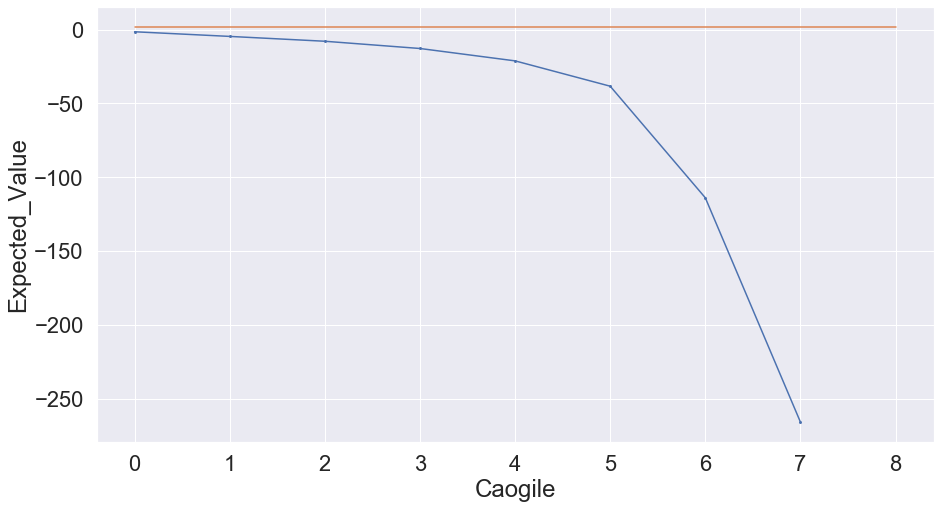

In [10]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 8, forward=True)
ax.plot(batch_list, mean_EV_list,   '.-')
plt.rc('font', size=28)
plt.xlabel("Caogile")
plt.ylabel("Expected_Value")
_ = plt.plot([0, len(batch_list)], [2, 2])


#plt.xlim(-800,500)
#plt.ylim(0,3000)

plt.grid(True)
plt.show()

## investigate why there's a spike here compared the same plot for TOTAL AMNT MATCHED RUNNER

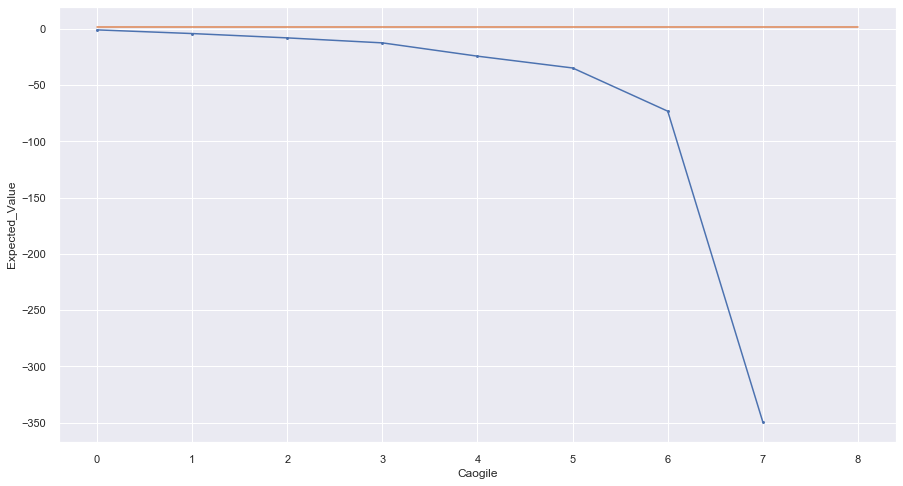

In [524]:
j_list = []
for j in range(len(bin_list)):
    df1 = df[df.binned_TOTAL_MATCHED_ON_RUNNER ==  bin_list[j]]

    #market_list = df.groupby('MARKETID').count().RUNNER_NAME.index.tolist()

    reward_list = []

    for i in range(100):
        #rand_1 = randrange(len(market_list))
        rand = randrange(len(df1))
        reward = (df1.iloc[rand].WINNER) * (df1.iloc[rand].BACKPRICE)

        reward_list.append(reward)

    j_list.append(np.mean(reward_list))

fig, ax = plt.subplots()
fig.set_size_inches(15, 8, forward=True)
ax.plot(batch_list, j_list,   '.-')
plt.rc('font', size=28)
plt.xlabel("Caogile")
plt.ylabel("Expected_Value")
_ = plt.plot([0, len(batch_list)], [2, 2])


#plt.xlim(-800,500)
#plt.ylim(0,3000)

plt.grid(True)
plt.show()

In [11]:
df = df.sort_values(by=['HORSE_RANKING_BY_PRICE'], ascending = False)
df = df.drop(['level_0'], axis = 1)
df = df.reset_index()

df['rank_HORSE_RANKING_BY_PRICE'] = df.index.values

df['binned_HORSE_RANKING_BY_PRICE'] = pd.qcut(df['rank_HORSE_RANKING_BY_PRICE'],iles)

prob_list = list(df.groupby('binned_HORSE_RANKING_BY_PRICE').WINNER.sum()/bin_size)

bin_list = list(df.groupby('binned_HORSE_RANKING_BY_PRICE').WINNER.sum().index)

#df[df.binned == bin_list[0]]['EV_HORSE_RANKING_BY_PRICE'] = prob_list[0] * df[df.binned == bin_list[0]].BACKPRICE

def win_prob(binned, price):
    return prob_list[bin_list.index(binned)]

def EV_calc(binned, price):
    EV = prob_list[bin_list.index(binned)] * price
    return EV

#df['batch_prob'] = df.apply(lambda row: win_prob(row['binned'],row['BACKPRICE']), axis=1)

df['EV_HORSE_RANKING_BY_PRICE'] = df.apply(lambda row: EV_calc(row['binned_HORSE_RANKING_BY_PRICE'],row['BACKPRICE']), axis=1)

mean_EV_list = list(df.groupby('binned_HORSE_RANKING_BY_PRICE').EV_HORSE_RANKING_BY_PRICE.mean())

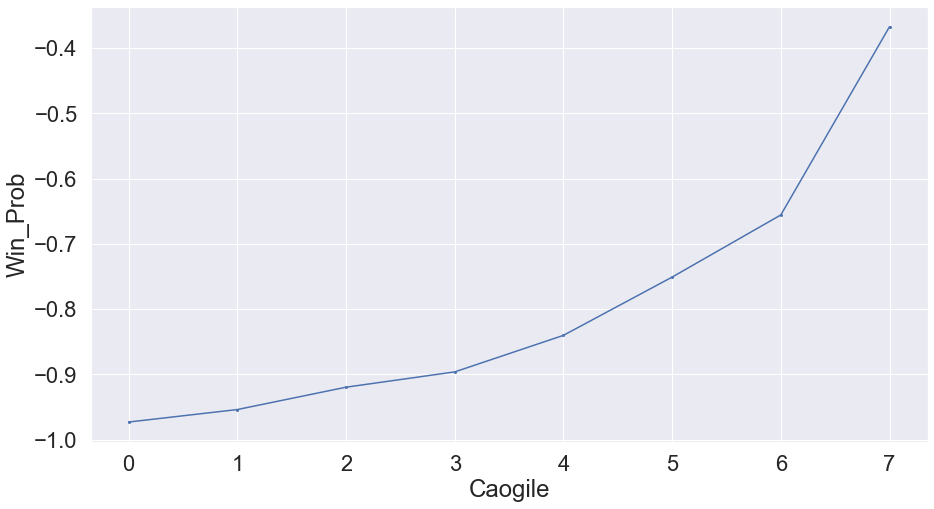

In [12]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 8, forward=True)
ax.plot(batch_list, prob_list,   '.-')
plt.rc('font', size=28)
plt.xlabel("Caogile")
plt.ylabel("Win_Prob")
#_ = plt.plot([0, len(batch_list)], [1, 1])


#plt.xlim(-800,500)
#plt.ylim(0,3000)

plt.grid(True)
plt.show()

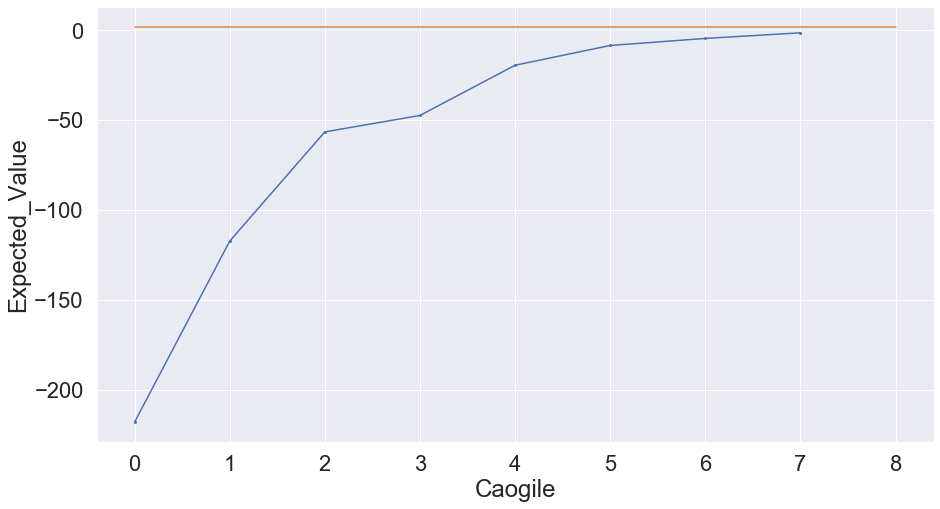

In [13]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 8, forward=True)
ax.plot(batch_list, mean_EV_list,   '.-')
plt.rc('font', size=28)
plt.xlabel("Caogile")
plt.ylabel("Expected_Value")
_ = plt.plot([0, len(batch_list)], [2, 2])


#plt.xlim(-800,500)
#plt.ylim(0,3000)

plt.grid(True)
plt.show()

In [218]:
df = df.sort_values(by=['TOTAL_WLR'], ascending = False)
df = df.drop(['level_0'], axis = 1)
df = df.reset_index()

df['rank_TOTAL_WLR'] = df.index.values

df['binned_TOTAL_WLR'] = pd.qcut(df['rank_TOTAL_WLR'],iles)

prob_list = list(df.groupby('binned_TOTAL_WLR').WINNER.sum()/bin_size)

bin_list = list(df.groupby('binned_TOTAL_WLR').WINNER.sum().index)

#df[df.binned == bin_list[0]]['EV'] = prob_list[0] * df[df.binned == bin_list[0]].BACKPRICE

def win_prob(binned, price):
    return prob_list[bin_list.index(binned)]

def EV_calc(binned, price):
    EV = prob_list[bin_list.index(binned)] * price
    return EV

#df['batch_prob'] = df.apply(lambda row: win_prob(row['binned'],row['BACKPRICE']), axis=1)

df['EV_TOTAL_WLR'] = df.apply(lambda row: EV_calc(row['binned_TOTAL_WLR'],row['BACKPRICE']), axis=1)

mean_EV_list = list(df.groupby('binned_TOTAL_WLR').EV_TOTAL_WLR.mean())

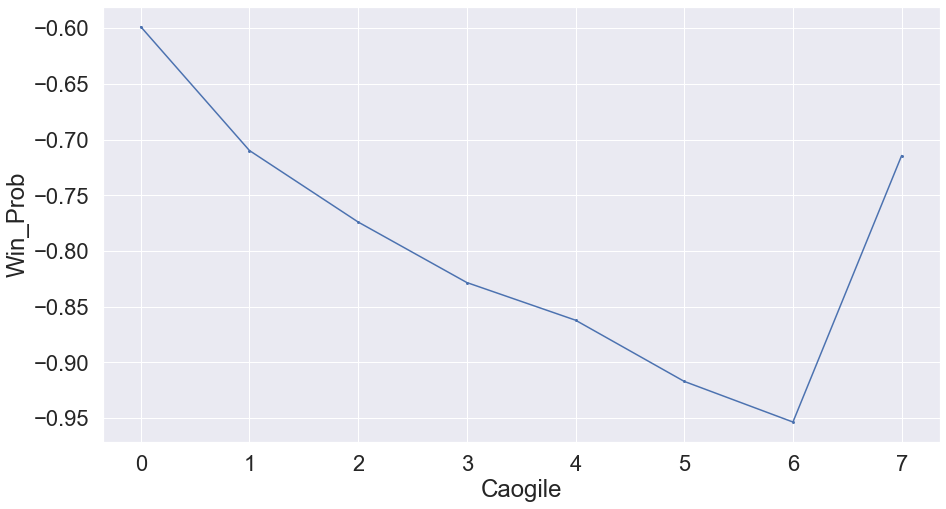

In [219]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 8, forward=True)
ax.plot(batch_list, prob_list,   '.-')
plt.rc('font', size=28)
plt.xlabel("Caogile")
plt.ylabel("Win_Prob")
#_ = plt.plot([0, len(batch_list)], [1, 1])


#plt.xlim(-800,500)
#plt.ylim(0,3000)

plt.grid(True)
plt.show()

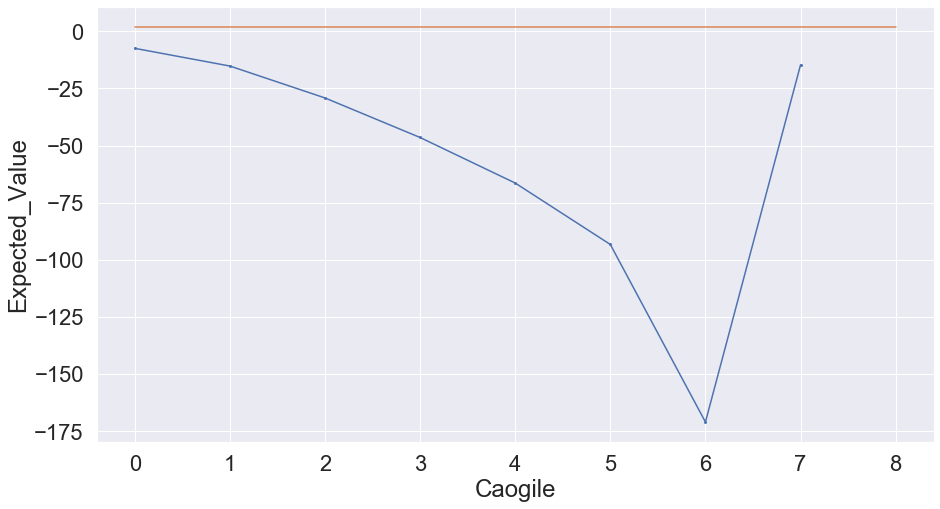

In [220]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 8, forward=True)
ax.plot(batch_list, mean_EV_list,   '.-')
plt.rc('font', size=28)
plt.xlabel("Caogile")
plt.ylabel("Expected_Value")
_ = plt.plot([0, len(batch_list)], [2, 2])


#plt.xlim(-800,500)
#plt.ylim(0,3000)

plt.grid(True)
plt.show()

In [221]:
df = df.sort_values(by=['SORT_PRIORITY'], ascending = False)
df = df.drop(['level_0'], axis = 1)
df = df.reset_index()

df['rank_SORT_PRIORITY'] = df.index.values

df['binned_SORT_PRIORITY'] = pd.qcut(df['rank_SORT_PRIORITY'],iles)

prob_list = list(df.groupby('binned_SORT_PRIORITY').WINNER.sum()/bin_size)

bin_list = list(df.groupby('binned_SORT_PRIORITY').WINNER.sum().index)

#df[df.binned == bin_list[0]]['EV'] = prob_list[0] * df[df.binned == bin_list[0]].BACKPRICE

def win_prob(binned, price):
    return prob_list[bin_list.index(binned)]

def EV_calc(binned, price):
    EV = prob_list[bin_list.index(binned)] * price
    return EV

#df['batch_prob'] = df.apply(lambda row: win_prob(row['binned'],row['BACKPRICE']), axis=1)

df['EV_SORT_PRIORITY'] = df.apply(lambda row: EV_calc(row['binned_SORT_PRIORITY'],row['BACKPRICE']), axis=1)

mean_EV_list = list(df.groupby('binned_SORT_PRIORITY').EV_SORT_PRIORITY.mean())

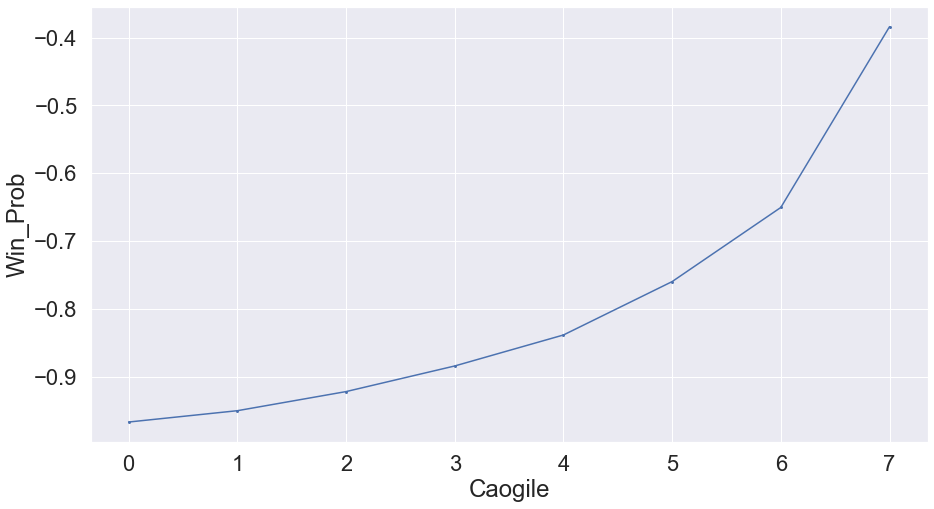

In [222]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 8, forward=True)
ax.plot(batch_list, prob_list,   '.-')
plt.rc('font', size=28)
plt.xlabel("Caogile")
plt.ylabel("Win_Prob")
#_ = plt.plot([0, len(batch_list)], [1, 1])


#plt.xlim(-800,500)
#plt.ylim(0,3000)

plt.grid(True)
plt.show()

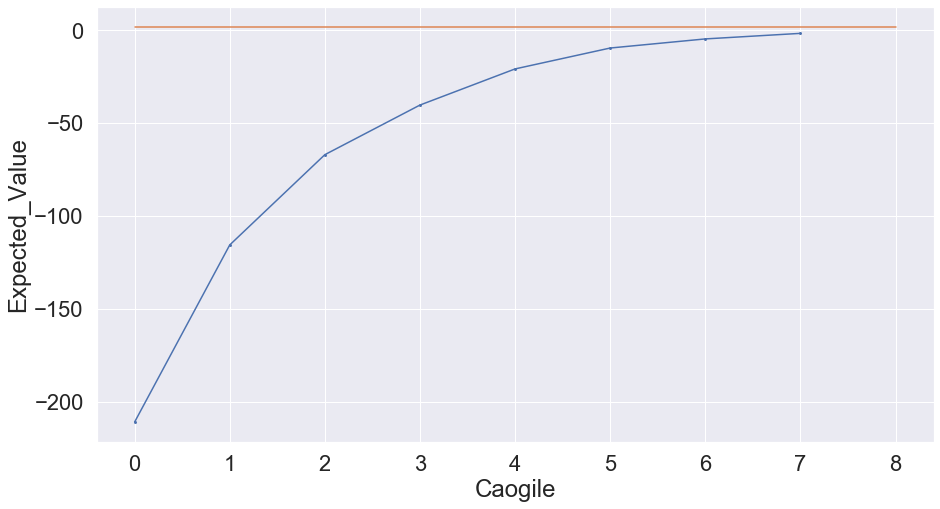

In [223]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 8, forward=True)
ax.plot(batch_list, mean_EV_list,   '.-')
plt.rc('font', size=28)
plt.xlabel("Caogile")
plt.ylabel("Expected_Value")
_ = plt.plot([0, len(batch_list)], [2, 2])


#plt.xlim(-800,500)
#plt.ylim(0,3000)

plt.grid(True)
plt.show()

In [224]:
df = df.sort_values(by=['STALL_DRAW'], ascending = False)
df = df.drop(['level_0'], axis = 1)
df = df.reset_index()

df['rank_STALL_DRAW'] = df.index.values

df['binned_STALL_DRAW'] = pd.qcut(df['rank_STALL_DRAW'],iles)

prob_list = list(df.groupby('binned_STALL_DRAW').WINNER.sum()/bin_size)

bin_list = list(df.groupby('binned_STALL_DRAW').WINNER.sum().index)

#df[df.binned == bin_list[0]]['EV'] = prob_list[0] * df[df.binned == bin_list[0]].BACKPRICE

def win_prob(binned, price):
    return prob_list[bin_list.index(binned)]

def EV_calc(binned, price):
    EV = prob_list[bin_list.index(binned)] * price
    return EV

#df['batch_prob'] = df.apply(lambda row: win_prob(row['binned'],row['BACKPRICE']), axis=1)

df['EV_STALL_DRAW'] = df.apply(lambda row: EV_calc(row['binned_STALL_DRAW'],row['BACKPRICE']), axis=1)

mean_EV_list = list(df.groupby('binned_STALL_DRAW').EV_STALL_DRAW.mean())

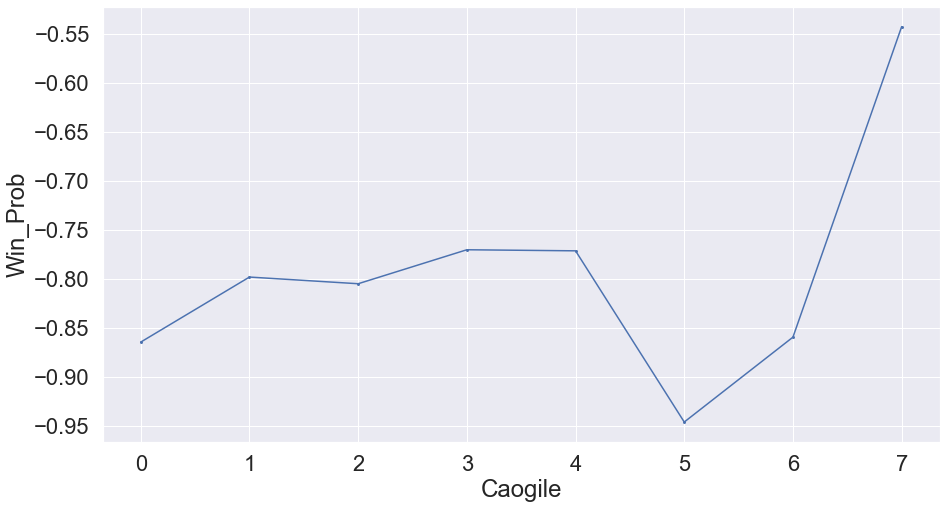

In [225]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 8, forward=True)
ax.plot(batch_list, prob_list,   '.-')
plt.rc('font', size=28)
plt.xlabel("Caogile")
plt.ylabel("Win_Prob")
#_ = plt.plot([0, len(batch_list)], [1, 1])


#plt.xlim(-800,500)
#plt.ylim(0,3000)

plt.grid(True)
plt.show()

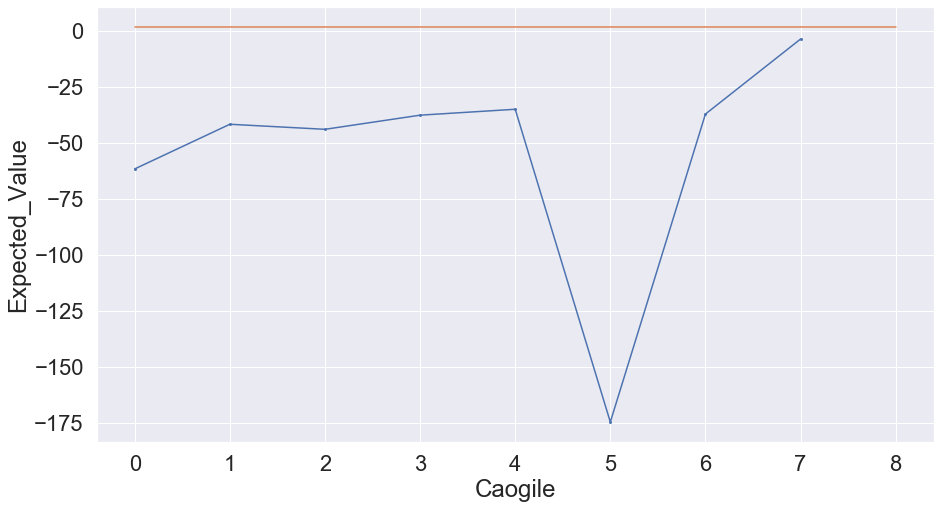

In [226]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 8, forward=True)
ax.plot(batch_list, mean_EV_list,   '.-')
plt.rc('font', size=28)
plt.xlabel("Caogile")
plt.ylabel("Expected_Value")
_ = plt.plot([0, len(batch_list)], [2, 2])


#plt.xlim(-800,500)
#plt.ylim(0,3000)

plt.grid(True)
plt.show()

In [227]:
df = df.sort_values(by=['NUMBEROFACTIVERUNNERS'], ascending = False)
df = df.drop(['level_0'], axis = 1)
df = df.reset_index()

df['rank_NUMBEROFACTIVERUNNERS'] = df.index.values

df['binned_NUMBEROFACTIVERUNNERS'] = pd.qcut(df['rank_NUMBEROFACTIVERUNNERS'],iles)

prob_list = list(df.groupby('binned_NUMBEROFACTIVERUNNERS').WINNER.sum()/bin_size)

bin_list = list(df.groupby('binned_NUMBEROFACTIVERUNNERS').WINNER.sum().index)

#df[df.binned == bin_list[0]]['EV'] = prob_list[0] * df[df.binned == bin_list[0]].BACKPRICE

def win_prob(binned, price):
    return prob_list[bin_list.index(binned)]

def EV_calc(binned, price):
    EV = prob_list[bin_list.index(binned)] * price
    return EV

#df['batch_prob'] = df.apply(lambda row: win_prob(row['binned'],row['BACKPRICE']), axis=1)

df['EV_NUMBEROFACTIVERUNNERS'] = df.apply(lambda row: EV_calc(row['binned_NUMBEROFACTIVERUNNERS'],row['BACKPRICE']), axis=1)

mean_EV_list = list(df.groupby('binned_NUMBEROFACTIVERUNNERS').EV_NUMBEROFACTIVERUNNERS.mean())

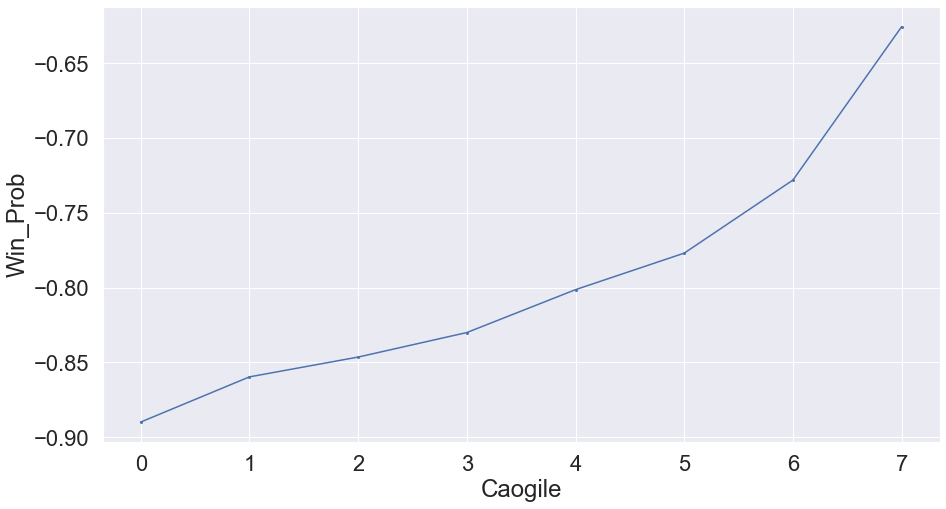

In [228]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 8, forward=True)
ax.plot(batch_list, prob_list,   '.-')
plt.rc('font', size=28)
plt.xlabel("Caogile")
plt.ylabel("Win_Prob")
#_ = plt.plot([0, len(batch_list)], [1, 1])


#plt.xlim(-800,500)
#plt.ylim(0,3000)

plt.grid(True)
plt.show()

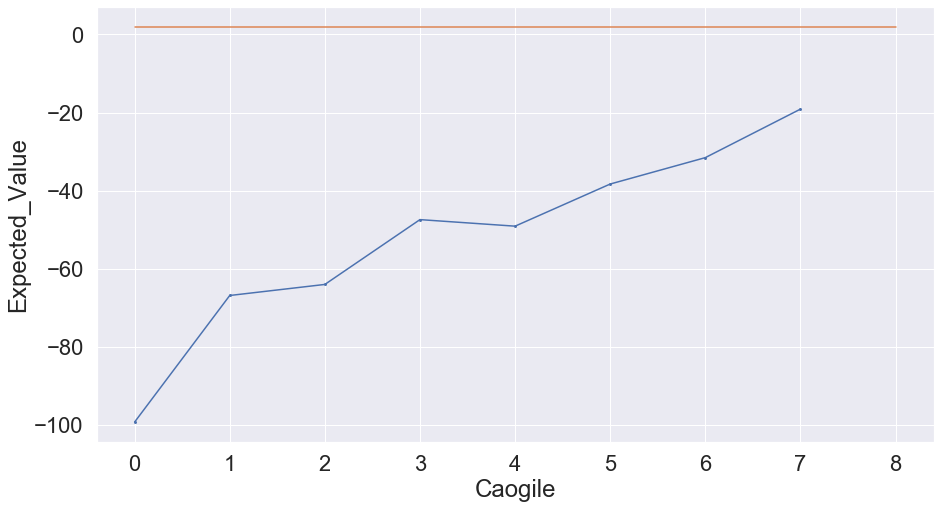

In [229]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 8, forward=True)
ax.plot(batch_list, mean_EV_list,   '.-')
plt.rc('font', size=28)
plt.xlabel("Caogile")
plt.ylabel("Expected_Value")
_ = plt.plot([0, len(batch_list)], [2, 2])


#plt.xlim(-800,500)
#plt.ylim(0,3000)

plt.grid(True)
plt.show()

In [230]:
df = df.sort_values(by=['OFFICIAL_RATING'], ascending = False)
df = df.drop(['level_0'], axis = 1)
df = df.reset_index()

df['rank_OFFICIAL_RATING'] = df.index.values

df['binned_OFFICIAL_RATING'] = pd.qcut(df['rank_OFFICIAL_RATING'],iles)

prob_list = list(df.groupby('binned_OFFICIAL_RATING').WINNER.sum()/bin_size)

bin_list = list(df.groupby('binned_OFFICIAL_RATING').WINNER.sum().index)

#df[df.binned == bin_list[0]]['EV'] = prob_list[0] * df[df.binned == bin_list[0]].BACKPRICE

def win_prob(binned, price):
    return prob_list[bin_list.index(binned)]

def EV_calc(binned, price):
    EV = prob_list[bin_list.index(binned)] * price
    return EV

#df['batch_prob_OFFICIAL_RATING'] = df.apply(lambda row: win_prob(row['binned'],row['BACKPRICE']), axis=1)

df['EV_OFFICIAL_RATING'] = df.apply(lambda row: EV_calc(row['binned_OFFICIAL_RATING'],row['BACKPRICE']), axis=1)

mean_EV_list = list(df.groupby('binned_OFFICIAL_RATING').EV_OFFICIAL_RATING.mean())

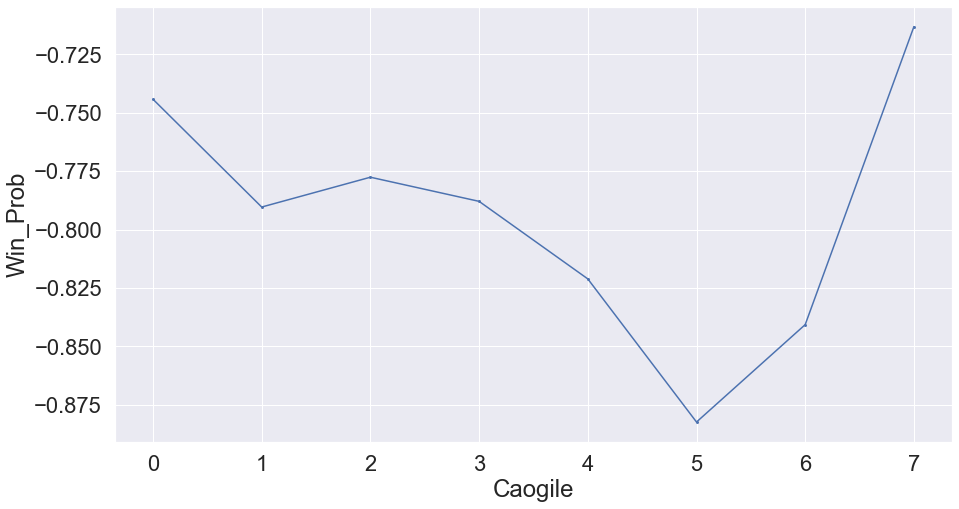

In [231]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 8, forward=True)
ax.plot(batch_list, prob_list,   '.-')
plt.rc('font', size=28)
plt.xlabel("Caogile")
plt.ylabel("Win_Prob")
#_ = plt.plot([0, len(batch_list)], [1, 1])


#plt.xlim(-800,500)
#plt.ylim(0,3000)

plt.grid(True)
plt.show()

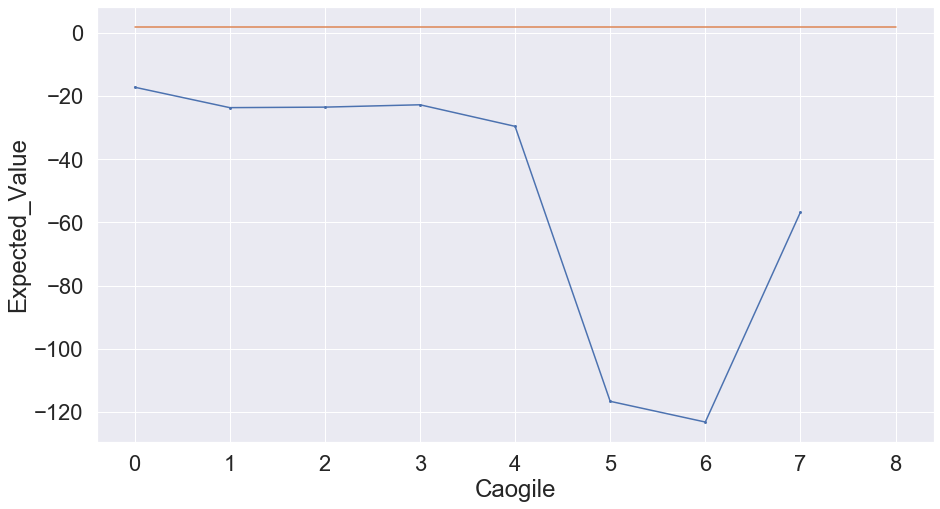

In [232]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 8, forward=True)
ax.plot(batch_list, mean_EV_list,   '.-')
plt.rc('font', size=28)
plt.xlabel("Caogile")
plt.ylabel("Expected_Value")
_ = plt.plot([0, len(batch_list)], [2, 2])


#plt.xlim(-800,500)
#plt.ylim(0,3000)

plt.grid(True)
plt.show()

In [14]:
bin_list_1 = list(df.groupby('binned_AMT_BACKED_2_SECS_OUT').WINNER.sum().index)
bin_list_2 =  list(df.groupby('binned_HORSE_RANKING_BY_PRICE').WINNER.sum().index)

In [15]:
df = df.drop(['WINNER', 'LOSER', 'REMOVED'],axis=1)
df = pd.concat([df,pd.get_dummies(df.HORSE_RESULT)], axis = 1)

In [22]:
df.head()

level_0   index  Unnamed: 0 RACE_TRACK  MARKETID  SELECTIONID  \
0    88453    7114       22126       NEWM  1.148748      8628397   
1   103682    7092       11506       NEWM  1.148748     12814088   
2    93562    7117       11551       NEWM  1.148748      8745116   
3   101856   58579       59005      FAIRY  1.157792      9033704   
4    95674  123151      122562       NEWM  1.163490     10460458   

        RUNNER_NAME RACE_START_TIME LIVE_RACE_STATUS  MEETING_ID  \
0  MYTHICAL MADNESS       29-SEP-18             OPEN  28925600.0   
1    VENTURA KNIGHT       29-SEP-18             OPEN  28925600.0   
2          MISTIROC       29-SEP-18             OPEN  28925600.0   
3           OUT SAM       22-APR-19             OPEN  29242844.0   
4     HERMOSO MUNDO       12-OCT-19             OPEN  29520902.0   

        RACE_NAME  RACE_DISTANCE  RACE_TYPE       RACE_ID  RACE_STATUS  \
0  1M1F HCAP STKS            1.1  HCAP STKS  2.892560e+07          NaN   
1  1M1F HCAP STKS            1.1  HCAP STKS  2.892560e+07          NaN   
2  1M1F HCAP STKS            1.1  HCAP STKS  2.892560e+07          NaN   
3   3M5F HCAP CHS            3.5   HCAP CHS  2.924284e+07          NaN   
4  2M2F HCAP STKS            2.2  HCAP STKS  2.952090e+07          NaN   

   DAYS_SINCE_LAST_RUN SEX_TYPE   AGE  SORT_PRIORITY    JOCKEY_NAME  \
0                  9.0        G   NaN           30.0  CAMERON NOBLE   
1                 58.0        C   NaN           33.0     BEN CURTIS   
2                 33.0        G   NaN           29.0    S. P. DAVIS   
3                 29.0        G  10.0           30.0       B. HAYES   
4                 23.0        G   7.0           30.0     SEAN LEVEY   

      TRAINER_NAME                    OWNER_NAME HORSE_FORM LAST_RACE  \
0    DAVID O'MEARA              MR J. C. G. CHUA     554083         3   
1    MARK JOHNSTON  MIDDLEHAM PARK RACING XXXVII     011430         0   
2       JOHN QUINN          DREW & AILSA RUSSELL     423935         5   
3   GORDON ELLIOTT            MR D. CHARLESWORTH    3-1574P         P   
4  HUGHIE MORRISON     OUT OF AFRICA PARTNERSHIP     940605         5   

  SECOND_LAST_RACE LAST_TWO_RACES  WEIGHT_VALUE WEIGHT_UNITS  JOCKEY_CLAIM  \
0                8             83         126.0       POUNDS           5.0   
1                3             30         127.0       POUNDS           NaN   
2                -             -5         128.0       POUNDS           5.0   
3                4             4P         144.0       POUNDS           NaN   
4                0             05         124.0       POUNDS           NaN   

                  WEARING  OFFICIAL_RATING  FORECASTPRICE_DENOMINATOR  \
0             CHEEKPIECES             97.0                        1.0   
1                     NaN            103.0                        1.0   
2                   VISOR             99.0                        1.0   
3  VISOR AND TONGUE STRAP            140.0                        1.0   
4                     NaN             92.0                        1.0   

   FORECASTPRICE_NUMERATOR    SIRE_NAME  SIRE_YEAR_BORN SIRE_BRED  \
0                     66.0       DUBAWI          2002.0       IRE   
1                    100.0    CASAMENTO          2008.0       IRE   
2                    100.0   ROCAMADOUR          2002.0        UK   
3                     50.0    MULTIPLEX          2003.0        UK   
4                    150.0  IDEAL WORLD          2005.0       USA   

           DAM_NAME DAM_BRED  DAM_YEAR_BORN    DAMSIRE_NAME  \
0       MISS DELILA      USA         2005.0     MALIBU MOON   
1  ALLTHERIGHTMOVES      IRE         2008.0           NAMID   
2       MISTINGUETT      IRE         1992.0          DOYOUN   
3           TINTERA      IRE         1999.0  KING'S THEATRE   
4     ESCOLETA FITZ      ARG         1997.0    FITZCARRALDO   

   DAMSIRE_YEAR_BORN DAMSIRE_BRED  STALL_DRAW  ADJUSTED_RATING  \
0             1997.0          USA        18.0              0.0   
1             1996.0           UK       

In [144]:
count_list = []
j_list = []
for j in range(len(bin_list_1)):
    for k in range(len(bin_list_2)):
        df1 = df[(df.binned_AMT_BACKED_2_SECS_OUT ==  bin_list_1[j]) & (df.binned_HORSE_RANKING_BY_PRICE ==  bin_list_2[k])]
        count_list.append(len(df1))
        gain = np.sum(df1.WINNER * (df1.BACKPRICE)-1)
        loss = df1.LOSER.sum()
        reward = gain - loss
        j_list.append(reward)

In [145]:
data = np.asarray(j_list).reshape((iles,iles))
data_count = np.asarray(count_list).reshape((iles,iles))

#data = np.log10(data)
#data_count = np.log10(data_count)

In [146]:
#j_list.sort()
#j_list

In [147]:
#sns.set(font_scale=4)
sns.set(rc={'figure.figsize':(15,8.27)})

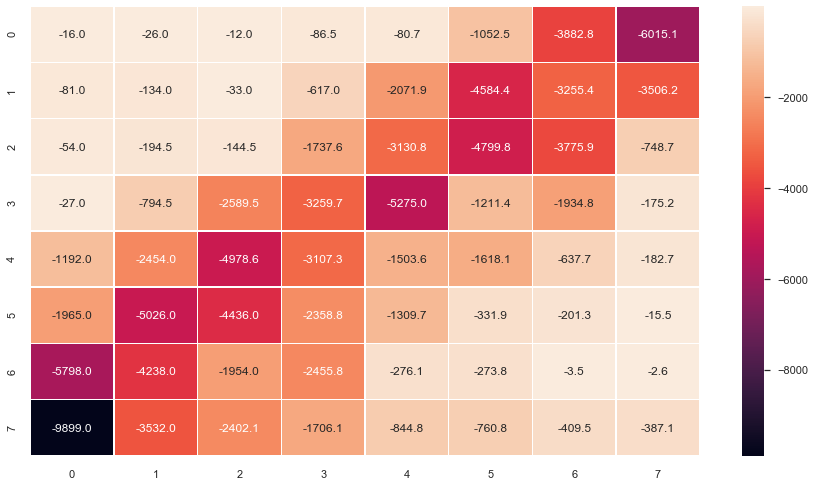

In [148]:
ax = sns.heatmap(data, linewidth=0.5, annot = True, fmt = '.1f')
plt.show()

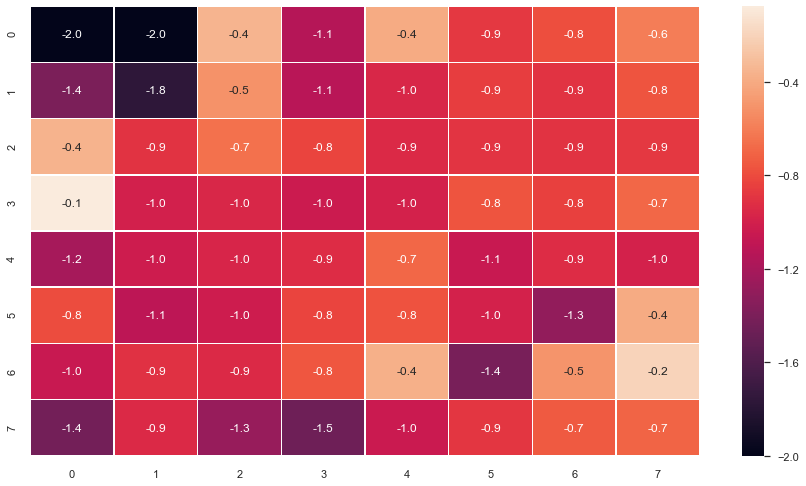

In [149]:
ax = sns.heatmap(data/data_count, linewidth=0.5, annot = True, fmt = '.1f')
plt.show()

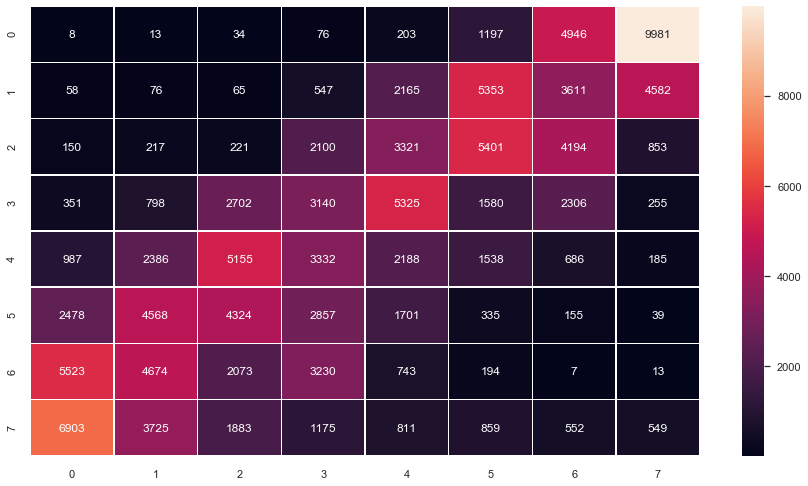

In [150]:
ax = sns.heatmap(data_count, linewidth=0.5, annot = True, fmt = 'd')
plt.show()

## y_axis is bin_list_1
## x_axis is bin_list_2

C:\Users\ivan\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in log10
  """Entry point for launching an IPython kernel.


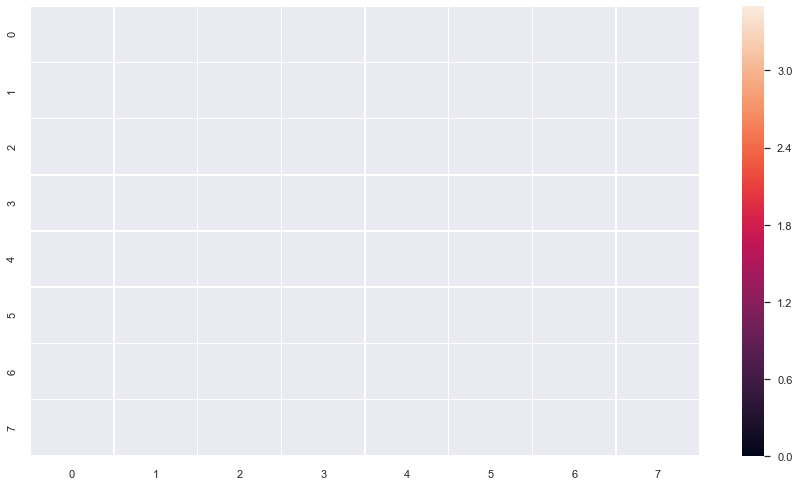

In [23]:
axs = sns.heatmap(np.log10(data), linewidth=0.5, vmin=0, vmax=3.5,annot = True, fmt = '.2f')
plt.show()

In [32]:
count_list = []
j_list = []
for j in range(len(bin_list_1)):
    for k in range(len(bin_list_2)):
        df1 = df[(df.binned_AMT_BACKED_2_SECS_OUT ==  bin_list_1[j]) & (df.binned_HORSE_RANKING_BY_PRICE ==  bin_list_2[k])]
        count_list.append(len(df1))
        reward_list = []

        for i in range(500):
            try:
                rand = randrange(len(df1))
                if (df1.iloc[rand].WINNER) == 1:
                    reward = (df1.iloc[rand].BACKPRICE-1)
                    
                else:
                    reward = -1
                    
            except:
                reward = 0
                
            reward_list.append(reward)

        j_list.append(np.sum(reward_list))

In [33]:
data = np.asarray(j_list).reshape((iles,iles))
data_count = np.asarray(count_list).reshape((iles,iles))

#data = np.log10(data)
#data_count = np.log10(data_count)

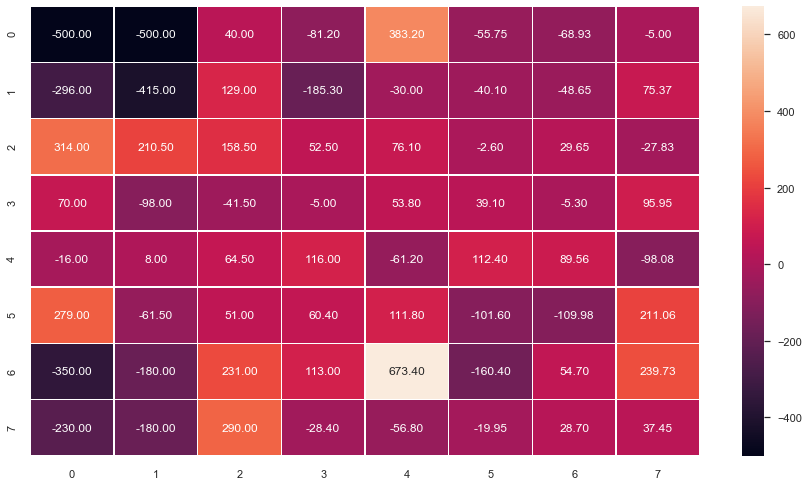

In [34]:
ax = sns.heatmap(data, linewidth=0.5,annot = True, fmt = '.2f')
plt.show()

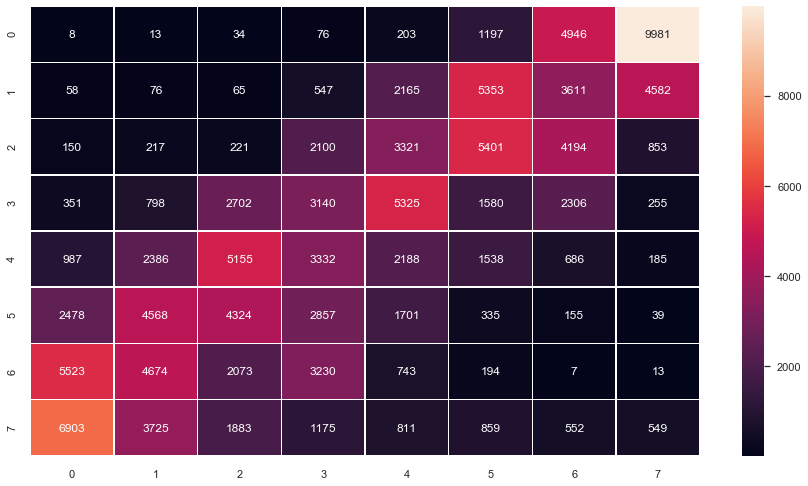

In [35]:
ax = sns.heatmap(data_count, linewidth=0.5,annot = True, fmt = 'd')
plt.show()

## y_axis is bin_list_1
## x_axis is bin_list_2

In [36]:
#axs = sns.heatmap(np.log10(data), linewidth=0.5, vmin=0, vmax=3.5)
#plt.show()

In [ ]:
#df1 = df[(df.binned_AMT_BACKED_2_SECS_OUT ==  bin_list_1[0]) & (df.binned_HORSE_RANKING_BY_PRICE ==  bin_list_2[18])]

arr_Test = np.asarray(Test)
reward_list = []
rand_list = []

for i in range(10000000):

    rand = randrange(len(arr_Test))
    
    if (arr_Test[rand,567]) == 1:
        reward = (arr_Test[rand, 60])-1

    elif(arr_Test[rand,567]) == 0:
        reward = -1


    reward_list.append(reward)
    rand_list.append(rand)
print (np.mean(reward_list))

In [ ]:
market_list = df.groupby('MARKETID').count().RUNNER_NAME.index.tolist()

reward_list = []

for i in range(500000):
    rand_1 = randrange(len(market_list))
    rand = randrange(len(df[df.MARKETID == market_list[rand_1]]))
    reward = (df[df.MARKETID == market_list[rand_1]].iloc[rand].WINNER) * (df[df.MARKETID == market_list[rand_1]].iloc[rand].BACKPRICE-1)

    reward_list.append(reward)

np.mean(reward_list)

In [149]:
df = pd.read_csv('HORSES_AIDAN.csv')
df = df.drop(['WINNER', 'LOSER', 'REMOVED'],axis=1)
df = pd.concat([df,pd.get_dummies(df.HORSE_RESULT)], axis = 1)

In [37]:
gain = np.sum(df.WINNER * (df.BACKPRICE)-1)
loss = df.LOSER.sum()
reward = gain - loss
reward

-121568.7

In [200]:
reward_list = []

for i in range(5000):
    try:
        rand = randrange(len(df))
        if (df.iloc[rand].WINNER) == 1:
            reward = (df.iloc[rand].BACKPRICE-1)

        else:
            reward = -1

    except:
        reward = 0

    reward_list.append(reward)
print (np.sum(reward_list))

-769.6700000000001


In [21]:
df = pd.read_csv('HORSES_AIDAN.csv')

In [191]:
df1 = df
#df1['WINNER'] = (df1['WINNER'].astype(int)*2)-1

market_list = df1.groupby('MARKETID').count().RUNNER_NAME.index.tolist()

reward_list = []

for i in range(len(market_list)):
    #rand_1 = randrange(len(market_list))
    rand = randrange(len(df1[df1.MARKETID == market_list[i]]))
    reward = ((df1[df1.MARKETID == market_list[i]].iloc[rand].WINNER) *\
              (df1[df1.MARKETID == market_list[i]].iloc[rand].BACKPRICE-1)) -\
              (df1[df1.MARKETID == market_list[i]].iloc[rand].LOSER)

    reward_list.append(reward)

np.sum(reward_list)

-436.6099999999999

In [25]:
len(market_list)

13498

In [26]:
len(reward_list)

13498

In [27]:
df1[df1.MARKETID == market_list[i]]

RACE_TRACK  MARKETID  SELECTIONID         RUNNER_NAME RACE_START_TIME  \
130709      MRKTR  1.164752     10884153          OXWICH BAY       07-NOV-19   
130710      MRKTR  1.164752     11065465  YORGONNAHEARMEROAR       07-NOV-19   
130711      MRKTR  1.164752      1176107        BLACK MARKET       07-NOV-19   
130712      MRKTR  1.164752     12389731       CARO DES FLOS       07-NOV-19   
130740      MRKTR  1.164752     17838224         AMZAC MAGIC       07-NOV-19   
130741      MRKTR  1.164752      6388374               BOWIE       07-NOV-19   
130742      MRKTR  1.164752       941390             ULYSSES       07-NOV-19   
130758      MRKTR  1.164752     12011469          UNBLINKING       07-NOV-19   
131021      MRKTR  1.164752     10696496     PRIDE OF LECALE       07-NOV-19   

       LIVE_RACE_STATUS  MEETING_ID      RACE_NAME  RACE_DISTANCE RACE_TYPE  \
130709             OPEN  29570280.0  2M4F HCAP HRD            2.4  HCAP HRD   
130710             OPEN  29570280.0  2M4F HCAP HRD            2.4  HCAP HRD   
130711             OPEN  29570280.0  2M4F HCAP HRD            2.4  HCAP HRD   
130712             OPEN  29570280.0  2M4F HCAP HRD            2.4  HCAP HRD   
130740             OPEN  29570280.0  2M4F HCAP HRD            2.4  HCAP HRD   
130741             OPEN  29570280.0  2M4F HCAP HRD            2.4  HCAP HRD   
130742             OPEN  29570280.0  2M4F HCAP HRD            2.4  HCAP HRD   
130758             OPEN  29570280.0  2M4F HCAP HRD            2.4  HCAP HRD   
131021             OPEN  29570280.0  2M4F HCAP HRD            2.4  HCAP HRD   

             RACE_ID  RACE_STATUS  DAYS_SINCE_LAST_RUN SEX_TYPE   AGE  \
130709  2.957028e+07          NaN                 37.0        G   7.0   
130710  2.957028e+07          NaN                214.0        G   8.0   
130711  2.957028e+07          NaN                144.0        G   5.0   
130712  2.957028e+07          NaN                114.0        G   7.0   
130740  2.957028e+07          NaN                245.0        G   7.0   
130741  2.957028e+07          NaN                218.0        G  12.0   
130742  2.957028e+07          NaN                 37.0        G   5.0   
130758  2.957028e+07          NaN                156.0        G   6.0   
131021  2.957028e+07          NaN                251.0        G   8.0   

        SORT_PRIORITY      JOCKEY_NAME          TRAINER_NAME  \
130709            4.0       ADAM WEDGE         EVAN WILLIAMS   
130710            8.0   LIAM TREADWELL          CLAIRE DYSON   
130711            9.0   COLM MCCORMACK           JOHN NORTON   
130712            5.0       MARK GRANT          JULIAN SMITH   
130740            2.0  NICK SCHOLFIELD        JACK R. BARBER   
130741            6.0  CHARLIE HAMMOND             NICK KENT   
130742            7.0     JAMES DAVIES            DEREK SHAW   
130758            3.0    JORDAN NAILOR  NIGEL TWISTON-DAVIES   
131021            1.0    PADDY BRENNAN        FERGAL O'BRIEN   

                                   OWNER_NAME HORSE_FORM LAST_RACE  \
130709                   MR DAVID M. WILLIAMS    F455-6U         U   
130710                         MR MARK DUNPHY   1/88U56-         -   
130711   FELLOWSHIP OF THE ROSE PARTNERSHIP 2     64-547         7   
130712     MRS J.A. BENSON & MISS S.N. BENSON    00-2535         5   
130740                        MR TONY HAYWARD   53/0431-         -   
130741  CYNTHIA COMMONS,MARINA KENT,NICK KENT    87255P-         -   
130742                  MILLION DREAMS RACING    83-1225         5   
130758                         MR R. N. BEVIS    1556-00         0   
131021        NOEL FEHILY RACING SYNDICATE 01       568-         -   

       SECOND_LAST_RACE LAST_TWO_RACES  WEIGHT_VALUE WEIGHT_UNITS  \
130709                6             6U         162.0       POUNDS   
130710                6             6-         164.0       POUNDS   
130711                4             47         162.0       POUNDS   
130712                3             35         166.0       POUNDS 

# Calculate OverRound

In [159]:
df1 = df
#df1['WINNER'] = (df1['WINNER'].astype(int)*2)-1

market_list = df1.groupby('MARKETID').count().RUNNER_NAME.index.tolist()

over_round_list = []

for i in range(len(market_list)):
    #rand_1 = randrange(len(market_list))
    
    over_round = np.sum(100/(df1[df1.MARKETID == market_list[i]].BACKPRICE))

    over_round_list.append(over_round)

np.mean(over_round_list)

101.71170564994202

In [161]:
sorted(over_round_list)

[67.93290043290042,
 73.98557725309644,
 78.84159929537128,
 79.59965052934527,
 90.87343538185492,
 91.17616880358705,
 92.36871797899488,
 92.41400194747051,
 97.68606301106301,
 98.61171119565587,
 99.5675505050505,
 99.74439892533233,
 99.8609593410351,
 99.93231406274884,
 100.01054838505775,
 100.01228183581125,
 100.01265435678958,
 100.03728404134554,
 100.04176935479927,
 100.04896909845849,
 100.04909360610004,
 100.05291005291006,
 100.05359972685201,
 100.05423791138077,
 100.05605728291754,
 100.06124393624391,
 100.06408320557264,
 100.06582297990967,
 100.06971675366891,
 100.07498716241113,
 100.07632186573149,
 100.08119158665836,
 100.08342055537413,
 100.08717219210696,
 100.08992561482688,
 100.09270566710151,
 100.09321622224849,
 100.09502923976609,
 100.09996379762875,
 100.10049919638962,
 100.10288852978371,
 100.1063007921937,
 100.1116979377849,
 100.11195700850872,
 100.11231207391457,
 100.11264342914913,
 100.1147234188382,
 100.11545533803596,
 100.117901

In [40]:
market_list = df1.groupby('MARKETID').RUNNER_NAME.count().index.tolist()
batch_list = range(0,len(market_list))

# bet on every horse

In [41]:
every_list = []

for i in range(len(market_list)):
    
    reward = (np.sum((df1[df1.MARKETID == market_list[i]].BACKPRICE -1) *\
                      df1[df1.MARKETID == market_list[i]].WINNER)) -\
              (np.sum(df1[df1.MARKETID == market_list[i]].LOSER))

    every_list.append(reward)

print (np.mean(every_list))
print (np.std(every_list))

-0.2539413246406874

# bet on fav strategy

In [47]:
fav_list = []

for i in range(len(market_list)):
    
    reward = ((df1[df1.MARKETID == market_list[i]].sort_values(by=['BACKPRICE']).BACKPRICE.iloc[0]-1) *\
               df1[df1.MARKETID == market_list[i]].sort_values(by=['BACKPRICE']).WINNER.iloc[0]) -\
              (df1[df1.MARKETID == market_list[i]].sort_values(by=['BACKPRICE']).LOSER.iloc[0])

    fav_list.append(reward)

print (np.mean(fav_list))
print (np.std(fav_list))

0.01685286709142095
1.566177170140854


In [87]:
market_list = df1.groupby('MARKETID').RUNNER_NAME.count().index.tolist()
batch_list = range(0,len(market_list))

monte_fav_list = []
for j in range(100):
    market_list = df1.groupby('MARKETID').RUNNER_NAME.count().index.tolist()
    market_list = random.sample(market_list, int(len(market_list)/5))
    
    fav_list = []

    for i in range(len(market_list)):

        reward = ((df1[df1.MARKETID == market_list[i]].sort_values(by=['BACKPRICE']).BACKPRICE.iloc[0]-1) *\
                   df1[df1.MARKETID == market_list[i]].sort_values(by=['BACKPRICE']).WINNER.iloc[0]) -\
                  (df1[df1.MARKETID == market_list[i]].sort_values(by=['BACKPRICE']).LOSER.iloc[0])

        fav_list.append(reward)

    monte_fav_list.append(fav_list)

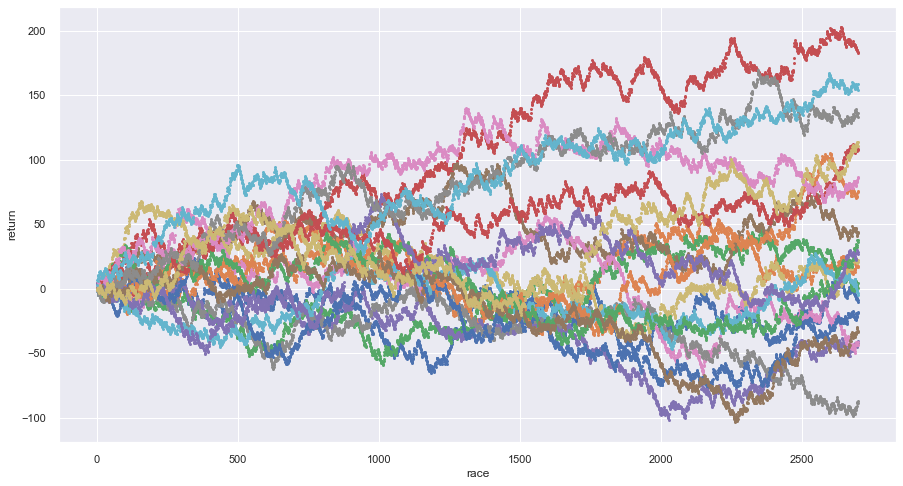

In [126]:
batch_list = range(0,int(len(market_list)))

fig, ax = plt.subplots()
fig.set_size_inches(15, 8, forward=True)

ax.plot(batch_list, np.cumsum(monte_fav_list[0]),   '.')
ax.plot(batch_list, np.cumsum(monte_fav_list[1]),   '.')
ax.plot(batch_list, np.cumsum(monte_fav_list[2]),   '.')
ax.plot(batch_list, np.cumsum(monte_fav_list[3]),   '.')
ax.plot(batch_list, np.cumsum(monte_fav_list[4]),   '.')
ax.plot(batch_list, np.cumsum(monte_fav_list[5]),   '.')
ax.plot(batch_list, np.cumsum(monte_fav_list[6]),   '.')
ax.plot(batch_list, np.cumsum(monte_fav_list[7]),   '.')
ax.plot(batch_list, np.cumsum(monte_fav_list[8]),   '.')
ax.plot(batch_list, np.cumsum(monte_fav_list[9]),   '.')
ax.plot(batch_list, np.cumsum(monte_fav_list[10]),   '.')
ax.plot(batch_list, np.cumsum(monte_fav_list[11]),   '.')
ax.plot(batch_list, np.cumsum(monte_fav_list[12]),   '.')
ax.plot(batch_list, np.cumsum(monte_fav_list[13]),   '.')
ax.plot(batch_list, np.cumsum(monte_fav_list[14]),   '.')
ax.plot(batch_list, np.cumsum(monte_fav_list[15]),   '.')
ax.plot(batch_list, np.cumsum(monte_fav_list[16]),   '.')
ax.plot(batch_list, np.cumsum(monte_fav_list[17]),   '.')
ax.plot(batch_list, np.cumsum(monte_fav_list[18]),   '.')
ax.plot(batch_list, np.cumsum(monte_fav_list[19]),   '.')
#ax.plot(batch_list, np.cumsum(monte_fav_list[20]),   '.')
#ax.plot(batch_list, np.cumsum(monte_fav_list[21]),   '.')
#ax.plot(batch_list, np.cumsum(monte_fav_list[22]),   '.')
#ax.plot(batch_list, np.cumsum(monte_fav_list[23]),   '.')
#ax.plot(batch_list, np.cumsum(monte_fav_list[24]),   '.')
#ax.plot(batch_list, np.cumsum(monte_fav_list[25]),   '.')
#ax.plot(batch_list, np.cumsum(monte_fav_list[26]),   '.')
#ax.plot(batch_list, np.cumsum(monte_fav_list[27]),   '.')
#ax.plot(batch_list, np.cumsum(monte_fav_list[28]),   '.')
#ax.plot(batch_list, np.cumsum(monte_fav_list[29]),   '.')
#ax.plot(batch_list, np.cumsum(monte_fav_list[30]),   '.')
#ax.plot(batch_list, np.cumsum(monte_fav_list[31]),   '.')
#ax.plot(batch_list, np.cumsum(monte_fav_list[32]),   '.')
#ax.plot(batch_list, np.cumsum(monte_fav_list[33]),   '.')
#ax.plot(batch_list, np.cumsum(monte_fav_list[34]),   '.')
#ax.plot(batch_list, np.cumsum(monte_fav_list[35]),   '.')
#ax.plot(batch_list, np.cumsum(monte_fav_list[36]),   '.')
#ax.plot(batch_list, np.cumsum(monte_fav_list[37]),   '.')
#ax.plot(batch_list, np.cumsum(monte_fav_list[38]),   '.')
#ax.plot(batch_list, np.cumsum(monte_fav_list[39]),   '.')



plt.rc('font', size=28)
plt.xlabel("race")
plt.ylabel("return")
#_ = plt.plot([0, len(batch_list)], [1, 1])


#plt.xlim(-800,500)
#plt.ylim(0,3000)

plt.grid(True)
plt.show()

46.67829999999999
77.02576778007474


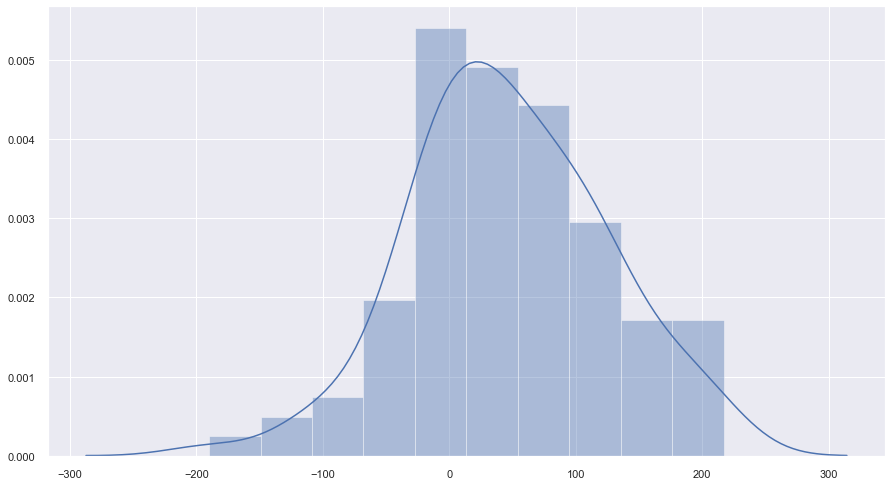

In [129]:
asd = []
for i in range(100):
    
    asd.append(np.cumsum(monte_fav_list[i])[-1])

print (np.mean(asd))
print (np.std(asd))

sns.distplot(asd)

# bet on 2nd Favourite

In [48]:
fav2_list = []

for i in range(len(market_list)):
    
    reward = ((df1[df1.MARKETID == market_list[i]].sort_values(by=['BACKPRICE']).BACKPRICE.iloc[1]-1) *\
               df1[df1.MARKETID == market_list[i]].sort_values(by=['BACKPRICE']).WINNER.iloc[1]) -\
              (df1[df1.MARKETID == market_list[i]].sort_values(by=['BACKPRICE']).LOSER.iloc[1])

    fav2_list.append(reward)

print (np.mean(fav2_list))
print (np.std(fav2_list))

-0.03069417691509854
2.0684241658382954


In [158]:
((df1[df1.MARKETID == market_list[i]].sort_values(by=['BACKPRICE']).BACKPRICE.iloc[0]-1) *\
df1[df1.MARKETID == market_list[i]].sort_values(by=['BACKPRICE']).WINNER.iloc[0]) -\
(df1[df1.MARKETID == market_list[i]].sort_values(by=['BACKPRICE']).LOSER.iloc[0])

2.5

In [164]:
df1[df1.MARKETID == market_list[1]].BACKPRICE

121244    3.85
Name: BACKPRICE, dtype: float64

In [165]:
df1.head()

level_0   index  Unnamed: 0 RACE_TRACK  MARKETID  SELECTIONID  \
118151   126699  117734      118361      PONTE  1.162855     25879471   
118161   126703  111294      111982       HAYD  1.162100     20233772   
118163   126709   61754       60795      NAVAN  1.158102     20080827   
118166   126710   38996       37829       HAYD  1.153723        11635   
118171   126684  103788      104697       CURR  1.161390     23929520   

           RUNNER_NAME RACE_START_TIME LIVE_RACE_STATUS  MEETING_ID  \
118151        MAX VEGA       26-SEP-19             OPEN  29493316.0   
118161  HELLO YOUMZAIN       07-SEP-19             OPEN  29454277.0   
118163    PINK DOGWOOD       28-APR-19             OPEN  29255444.0   
118166   SILVER STREAK       19-JAN-19             OPEN  29085781.0   
118171    SIR DRAGONET       16-AUG-19             OPEN  29419449.0   

               RACE_NAME  RACE_DISTANCE    RACE_TYPE       RACE_ID  \
118151       1M NOV STKS            1.0     NOV STKS  2.949332e+07   
118161           6F GRP1            0.6         GRP1  2.945428e+07   
118163  1M2F LISTED STKS            1.2  LISTED STKS  2.925544e+07   
118166    1M7F GRD 2 HRD            1.7    GRD 2 HRD  2.908578e+07   
118171         1M2F GRP3            1.2         GRP3  2.941945e+07   

        RACE_STATUS  DAYS_SINCE_LAST_RUN SEX_TYPE  AGE  SORT_PRIORITY  \
118151          NaN                 21.0        C  2.0            1.0   
118161          NaN                 78.0        C  3.0            1.0   
118163          NaN                203.0        F  3.0            1.0   
118166          NaN                 35.0        G  NaN            1.0   
118171          NaN                 76.0        C  3.0            1.0   

              JOCKEY_NAME   TRAINER_NAME  \
118151  RICHARD KINGSCOTE  RALPH BECKETT   
118161        JAMES DOYLE     KEVIN RYAN   
118163         RYAN MOORE  AIDAN O'BRIEN   
118166         ADAM WEDGE  EVAN WILLIAMS   
118171         RYAN MOORE  AIDAN O'BRIEN   

                                      OWNER_NAME HORSE_FORM LAST_RACE  \
118151             THE PICKFORD HILL PARTNERSHIP          2         2   
118161                         MR JABER ABDULLAH    121-413         3   
118163  DERRICK SMITH, MRS J. MAGNIER & M. TABOR      2215-         -   
118166                                MR L. FELL     U61122         2   
118171      MRS JOHN MAGNIER & M TABOR & D SMITH        115         5   

       SECOND_LAST_RACE LAST_TWO_RACES  WEIGHT_VALUE WEIGHT_UNITS  \
118151              NaN            NaN         130.0       POUNDS   
118161                1             13         127.0       POUNDS   
118163                5             5-         126.0       POUNDS   
118166                2             22         162.0       POUNDS   
118171                1             15         128.0       POUNDS   

        JOCKEY_CLAIM WEARING  OFFICIAL_RATING  FORECASTPRICE_DENOMINATOR  \
118151           NaN     NaN              NaN                        1.0   
118161           NaN     NaN            114.0                        1.0   
118163           NaN     NaN              NaN                        4.0   
118166           NaN     NaN            156.0                        1.0   
118171           NaN     NaN              NaN                       10.0   

        FORECASTPRICE_NUMERATOR     SIRE_NAME  SIRE_YEAR_BORN SIRE_BRED  \
118151                      1.0  LOPE DE VEGA          2007.0       IRE   
118161                     16.0        KODIAC          2001.0        UK   
118163                      6.0       CAMELOT          2009.0        UK   
118166                      2.0    DARK ANGEL          2005.0       IRE   
118171                      9.0       CAMELOT          2009.0        UK   

              DAM_NAME DAM_BRED  DAM_YEAR_BORN DAMSIRE_NAME  \
118151   PARAPHERNALIA      IRE         2007.0    DALAKHANI   
118161          SPASHA       UK         2008.0    SHAMARDAL   
118163  QUESTION TIMES       UK         2008.0    SHAMARDAL   
118

In [160]:
market_list = df1.groupby('MARKETID').RUNNER_NAME.count().index.tolist()
batch_list = range(0,len(market_list))

monte_fav2_list = []
for j in range(100):
    market_list = df1.groupby('MARKETID').RUNNER_NAME.count().index.tolist()
    market_list = random.sample(market_list, int(len(market_list)/5))
    
    fav2_list = []

    for i in range(len(market_list)):

        reward = ((df1[df1.MARKETID == market_list[i]].sort_values(by=['BACKPRICE']).BACKPRICE.iloc[1]-1) *\
                   df1[df1.MARKETID == market_list[i]].sort_values(by=['BACKPRICE']).WINNER.iloc[1]) -\
                  (df1[df1.MARKETID == market_list[i]].sort_values(by=['BACKPRICE']).LOSER.iloc[1])

        fav2_list.append(reward)

    monte_fav2_list.append(fav2_list)

IndexError: single positional indexer is out-of-bounds

IndexError: list index out of range

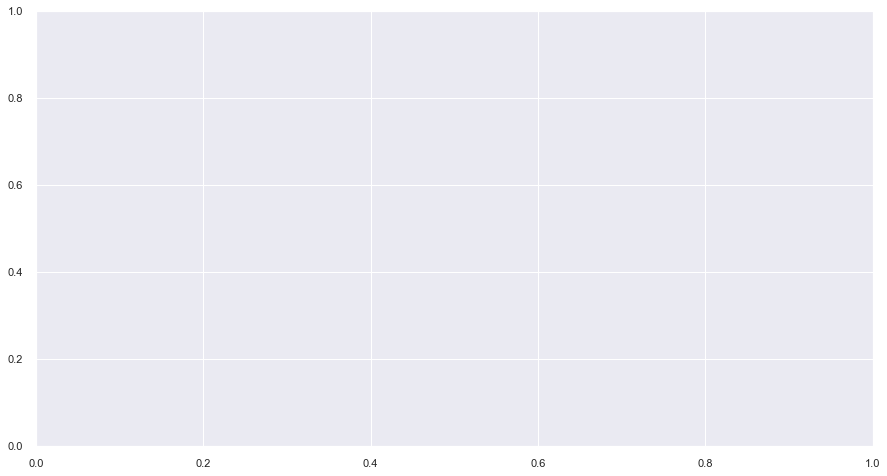

In [154]:
batch_list = range(0,int(len(market_list)))

fig, ax = plt.subplots()
fig.set_size_inches(15, 8, forward=True)

ax.plot(batch_list, np.cumsum(monte_fav2_list[0]),   '-')
ax.plot(batch_list, np.cumsum(monte_fav2_list[1]),   '-')
ax.plot(batch_list, np.cumsum(monte_fav2_list[2]),   '-')
ax.plot(batch_list, np.cumsum(monte_fav2_list[3]),   '-')
ax.plot(batch_list, np.cumsum(monte_fav2_list[4]),   '-')
ax.plot(batch_list, np.cumsum(monte_fav2_list[5]),   '-')
ax.plot(batch_list, np.cumsum(monte_fav2_list[6]),   '-')
ax.plot(batch_list, np.cumsum(monte_fav2_list[7]),   '-')
ax.plot(batch_list, np.cumsum(monte_fav2_list[8]),   '-')
ax.plot(batch_list, np.cumsum(monte_fav2_list[9]),   '-')
ax.plot(batch_list, np.cumsum(monte_fav2_list[10]),   '-')
ax.plot(batch_list, np.cumsum(monte_fav2_list[11]),   '-')
ax.plot(batch_list, np.cumsum(monte_fav2_list[12]),   '-')
ax.plot(batch_list, np.cumsum(monte_fav2_list[13]),   '-')
ax.plot(batch_list, np.cumsum(monte_fav2_list[14]),   '-')
ax.plot(batch_list, np.cumsum(monte_fav2_list[15]),   '-')
ax.plot(batch_list, np.cumsum(monte_fav2_list[16]),   '-')
ax.plot(batch_list, np.cumsum(monte_fav2_list[17]),   '-')
ax.plot(batch_list, np.cumsum(monte_fav2_list[18]),   '-')
ax.plot(batch_list, np.cumsum(monte_fav2_list[19]),   '-')
#ax.plot(batch_list, np.cumsum(monte_fav_list[20]),   '.')
#ax.plot(batch_list, np.cumsum(monte_fav_list[21]),   '.')
#ax.plot(batch_list, np.cumsum(monte_fav_list[22]),   '.')
#ax.plot(batch_list, np.cumsum(monte_fav_list[23]),   '.')
#ax.plot(batch_list, np.cumsum(monte_fav_list[24]),   '.')
#ax.plot(batch_list, np.cumsum(monte_fav_list[25]),   '.')
#ax.plot(batch_list, np.cumsum(monte_fav_list[26]),   '.')
#ax.plot(batch_list, np.cumsum(monte_fav_list[27]),   '.')
#ax.plot(batch_list, np.cumsum(monte_fav_list[28]),   '.')
#ax.plot(batch_list, np.cumsum(monte_fav_list[29]),   '.')
#ax.plot(batch_list, np.cumsum(monte_fav_list[30]),   '.')
#ax.plot(batch_list, np.cumsum(monte_fav_list[31]),   '.')
#ax.plot(batch_list, np.cumsum(monte_fav_list[32]),   '.')
#ax.plot(batch_list, np.cumsum(monte_fav_list[33]),   '.')
#ax.plot(batch_list, np.cumsum(monte_fav_list[34]),   '.')
#ax.plot(batch_list, np.cumsum(monte_fav_list[35]),   '.')
#ax.plot(batch_list, np.cumsum(monte_fav_list[36]),   '.')
#ax.plot(batch_list, np.cumsum(monte_fav_list[37]),   '.')
#ax.plot(batch_list, np.cumsum(monte_fav_list[38]),   '.')
#ax.plot(batch_list, np.cumsum(monte_fav_list[39]),   '.')



plt.rc('font', size=28)
plt.xlabel("race")
plt.ylabel("return")
#_ = plt.plot([0, len(batch_list)], [1, 1])


#plt.xlim(-800,500)
#plt.ylim(0,3000)

plt.grid(True)
plt.show()

In [ ]:
asd = []
for i in range(100):
    
    asd.append(np.cumsum(monte_fav2_list[i])[-1])

print (np.mean(asd))
print (np.std(asd))

sns.distplot(asd)

# bet on long shot

In [49]:
longshot_list = []

for i in range(len(market_list)):
    
    reward = ((df1[df1.MARKETID == market_list[i]].sort_values(by=['BACKPRICE'], ascending = False).BACKPRICE.iloc[0]-1) *\
               df1[df1.MARKETID == market_list[i]].sort_values(by=['BACKPRICE'], ascending = False).WINNER.iloc[0]) -\
              (df1[df1.MARKETID == market_list[i]].sort_values(by=['BACKPRICE'], ascending = False).LOSER.iloc[0])

    longshot_list.append(reward)

print (np.mean(longshot_list))
print (np.std(longshot_list))

0.10157875240776412
13.902603924094981


In [139]:
market_list = df1.groupby('MARKETID').RUNNER_NAME.count().index.tolist()
batch_list = range(0,len(market_list))

monte_longshot_list = []
for j in range(20):
    market_list = df1.groupby('MARKETID').RUNNER_NAME.count().index.tolist()
    market_list = random.sample(market_list, int(len(market_list)/5))
    
    longshot_list = []

    for i in range(len(market_list)):

        reward = ((df1[df1.MARKETID == market_list[i]].sort_values(by=['BACKPRICE'], ascending = False).BACKPRICE.iloc[0]-1) *\
                   df1[df1.MARKETID == market_list[i]].sort_values(by=['BACKPRICE'], ascending = False).WINNER.iloc[0]) -\
                  (df1[df1.MARKETID == market_list[i]].sort_values(by=['BACKPRICE'], ascending = False).LOSER.iloc[0])

        longshot_list.append(reward)

    monte_longshot_list.append(longshot_list)

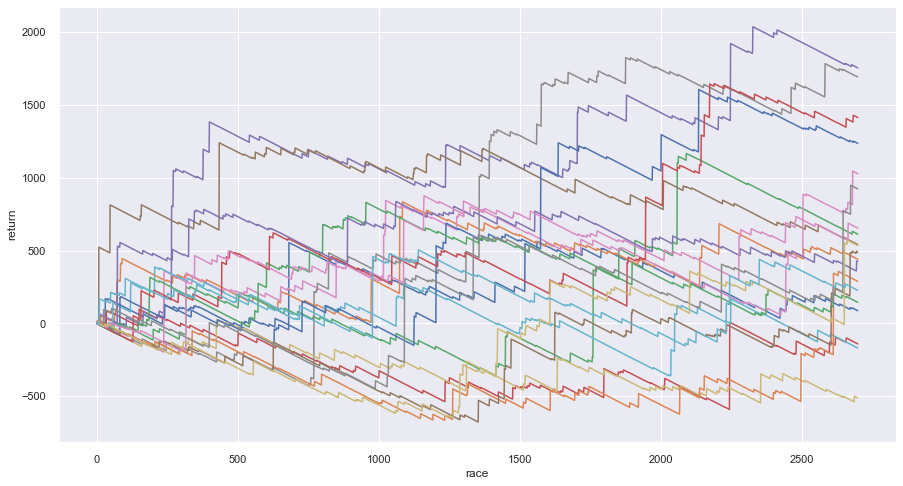

In [140]:
batch_list = range(0,int(len(market_list)))

fig, ax = plt.subplots()
fig.set_size_inches(15, 8, forward=True)

ax.plot(batch_list, np.cumsum(monte_longshot_list[0]),   '-')
ax.plot(batch_list, np.cumsum(monte_longshot_list[1]),   '-')
ax.plot(batch_list, np.cumsum(monte_longshot_list[2]),   '-')
ax.plot(batch_list, np.cumsum(monte_longshot_list[3]),   '-')
ax.plot(batch_list, np.cumsum(monte_longshot_list[4]),   '-')
ax.plot(batch_list, np.cumsum(monte_longshot_list[5]),   '-')
ax.plot(batch_list, np.cumsum(monte_longshot_list[6]),   '-')
ax.plot(batch_list, np.cumsum(monte_longshot_list[7]),   '-')
ax.plot(batch_list, np.cumsum(monte_longshot_list[8]),   '-')
ax.plot(batch_list, np.cumsum(monte_longshot_list[9]),   '-')
ax.plot(batch_list, np.cumsum(monte_longshot_list[10]),   '-')
ax.plot(batch_list, np.cumsum(monte_longshot_list[11]),   '-')
ax.plot(batch_list, np.cumsum(monte_longshot_list[12]),   '-')
ax.plot(batch_list, np.cumsum(monte_longshot_list[13]),   '-')
ax.plot(batch_list, np.cumsum(monte_longshot_list[14]),   '-')
ax.plot(batch_list, np.cumsum(monte_longshot_list[15]),   '-')
ax.plot(batch_list, np.cumsum(monte_longshot_list[16]),   '-')
ax.plot(batch_list, np.cumsum(monte_longshot_list[17]),   '-')
ax.plot(batch_list, np.cumsum(monte_longshot_list[18]),   '-')
ax.plot(batch_list, np.cumsum(monte_longshot_list[19]),   '-')
#ax.plot(batch_list, np.cumsum(monte_fav_list[20]),   '.')
#ax.plot(batch_list, np.cumsum(monte_fav_list[21]),   '.')
#ax.plot(batch_list, np.cumsum(monte_fav_list[22]),   '.')
#ax.plot(batch_list, np.cumsum(monte_fav_list[23]),   '.')
#ax.plot(batch_list, np.cumsum(monte_fav_list[24]),   '.')
#ax.plot(batch_list, np.cumsum(monte_fav_list[25]),   '.')
#ax.plot(batch_list, np.cumsum(monte_fav_list[26]),   '.')
#ax.plot(batch_list, np.cumsum(monte_fav_list[27]),   '.')
#ax.plot(batch_list, np.cumsum(monte_fav_list[28]),   '.')
#ax.plot(batch_list, np.cumsum(monte_fav_list[29]),   '.')
#ax.plot(batch_list, np.cumsum(monte_fav_list[30]),   '.')
#ax.plot(batch_list, np.cumsum(monte_fav_list[31]),   '.')
#ax.plot(batch_list, np.cumsum(monte_fav_list[32]),   '.')
#ax.plot(batch_list, np.cumsum(monte_fav_list[33]),   '.')
#ax.plot(batch_list, np.cumsum(monte_fav_list[34]),   '.')
#ax.plot(batch_list, np.cumsum(monte_fav_list[35]),   '.')
#ax.plot(batch_list, np.cumsum(monte_fav_list[36]),   '.')
#ax.plot(batch_list, np.cumsum(monte_fav_list[37]),   '.')
#ax.plot(batch_list, np.cumsum(monte_fav_list[38]),   '.')
#ax.plot(batch_list, np.cumsum(monte_fav_list[39]),   '.')



plt.rc('font', size=28)
plt.xlabel("race")
plt.ylabel("return")
#_ = plt.plot([0, len(batch_list)], [1, 1])


#plt.xlim(-800,500)
#plt.ylim(0,3000)

plt.grid(True)
plt.show()

290.74750000000006
453.2168573197051


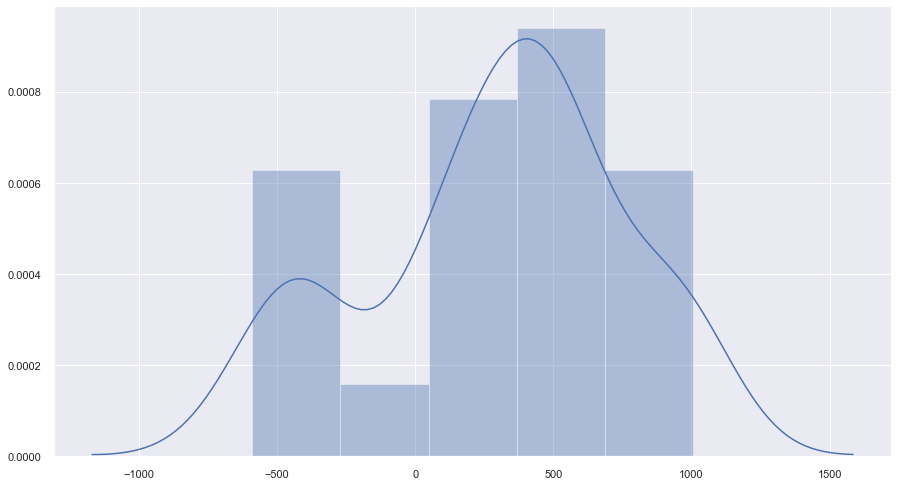

In [132]:
asd = []
for i in range(20):
    
    asd.append(np.cumsum(monte_longshot_list[i])[-1])

print (np.mean(asd))
print (np.std(asd))

sns.distplot(asd)

# bet on 2nd long shot

In [50]:
longshot2_list = []

for i in range(len(market_list)):
    
    reward = ((df1[df1.MARKETID == market_list[i]].sort_values(by=['BACKPRICE'], ascending = False).BACKPRICE.iloc[1]-1) *\
               df1[df1.MARKETID == market_list[i]].sort_values(by=['BACKPRICE'], ascending = False).WINNER.iloc[1]) -\
              (df1[df1.MARKETID == market_list[i]].sort_values(by=['BACKPRICE'], ascending = False).LOSER.iloc[1])

    longshot2_list.append(reward)

print (np.mean(longshot2_list))
print (np.std(longshot2_list))

-0.1127848570158542
7.176013576925394


In [141]:
market_list = df1.groupby('MARKETID').RUNNER_NAME.count().index.tolist()
batch_list = range(0,len(market_list))

monte_longshot2_list = []
for j in range(20):
    market_list = df1.groupby('MARKETID').RUNNER_NAME.count().index.tolist()
    market_list = random.sample(market_list, int(len(market_list)/5))
    
    longshot2_list = []

    for i in range(len(market_list)):

        reward = ((df1[df1.MARKETID == market_list[i]].sort_values(by=['BACKPRICE'], ascending = False).BACKPRICE.iloc[1]-1) *\
                   df1[df1.MARKETID == market_list[i]].sort_values(by=['BACKPRICE'], ascending = False).WINNER.iloc[1]) -\
                  (df1[df1.MARKETID == market_list[i]].sort_values(by=['BACKPRICE'], ascending = False).LOSER.iloc[1])

        longshot2_list.append(reward)

    monte_longshot2_list.append(longshot2_list)

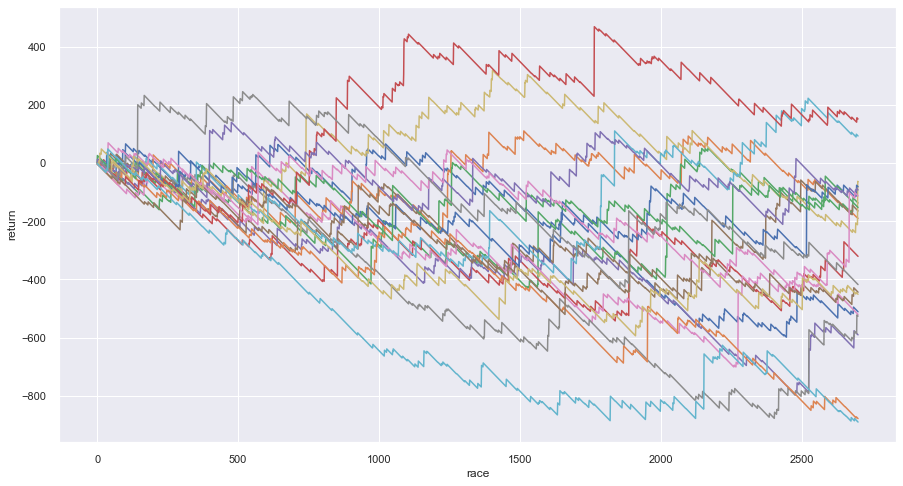

In [151]:
batch_list = range(0,int(len(market_list)))

fig, ax = plt.subplots()
fig.set_size_inches(15, 8, forward=True)

ax.plot(batch_list, np.cumsum(monte_longshot2_list[0]),   '-')
ax.plot(batch_list, np.cumsum(monte_longshot2_list[1]),   '-')
ax.plot(batch_list, np.cumsum(monte_longshot2_list[2]),   '-')
ax.plot(batch_list, np.cumsum(monte_longshot2_list[3]),   '-')
ax.plot(batch_list, np.cumsum(monte_longshot2_list[4]),   '-')
ax.plot(batch_list, np.cumsum(monte_longshot2_list[5]),   '-')
ax.plot(batch_list, np.cumsum(monte_longshot2_list[6]),   '-')
ax.plot(batch_list, np.cumsum(monte_longshot2_list[7]),   '-')
ax.plot(batch_list, np.cumsum(monte_longshot2_list[8]),   '-')
ax.plot(batch_list, np.cumsum(monte_longshot2_list[9]),   '-')
ax.plot(batch_list, np.cumsum(monte_longshot2_list[10]),   '-')
ax.plot(batch_list, np.cumsum(monte_longshot2_list[11]),   '-')
ax.plot(batch_list, np.cumsum(monte_longshot2_list[12]),   '-')
ax.plot(batch_list, np.cumsum(monte_longshot2_list[13]),   '-')
ax.plot(batch_list, np.cumsum(monte_longshot2_list[14]),   '-')
ax.plot(batch_list, np.cumsum(monte_longshot2_list[15]),   '-')
ax.plot(batch_list, np.cumsum(monte_longshot2_list[16]),   '-')
ax.plot(batch_list, np.cumsum(monte_longshot2_list[17]),   '-')
ax.plot(batch_list, np.cumsum(monte_longshot2_list[18]),   '-')
ax.plot(batch_list, np.cumsum(monte_longshot2_list[19]),   '-')
#ax.plot(batch_list, np.cumsum(monte_fav_list[20]),   '.')
#ax.plot(batch_list, np.cumsum(monte_fav_list[21]),   '.')
#ax.plot(batch_list, np.cumsum(monte_fav_list[22]),   '.')
#ax.plot(batch_list, np.cumsum(monte_fav_list[23]),   '.')
#ax.plot(batch_list, np.cumsum(monte_fav_list[24]),   '.')
#ax.plot(batch_list, np.cumsum(monte_fav_list[25]),   '.')
#ax.plot(batch_list, np.cumsum(monte_fav_list[26]),   '.')
#ax.plot(batch_list, np.cumsum(monte_fav_list[27]),   '.')
#ax.plot(batch_list, np.cumsum(monte_fav_list[28]),   '.')
#ax.plot(batch_list, np.cumsum(monte_fav_list[29]),   '.')
#ax.plot(batch_list, np.cumsum(monte_fav_list[30]),   '.')
#ax.plot(batch_list, np.cumsum(monte_fav_list[31]),   '.')
#ax.plot(batch_list, np.cumsum(monte_fav_list[32]),   '.')
#ax.plot(batch_list, np.cumsum(monte_fav_list[33]),   '.')
#ax.plot(batch_list, np.cumsum(monte_fav_list[34]),   '.')
#ax.plot(batch_list, np.cumsum(monte_fav_list[35]),   '.')
#ax.plot(batch_list, np.cumsum(monte_fav_list[36]),   '.')
#ax.plot(batch_list, np.cumsum(monte_fav_list[37]),   '.')
#ax.plot(batch_list, np.cumsum(monte_fav_list[38]),   '.')
#ax.plot(batch_list, np.cumsum(monte_fav_list[39]),   '.')



plt.rc('font', size=28)
plt.xlabel("race")
plt.ylabel("return")
#_ = plt.plot([0, len(batch_list)], [1, 1])


#plt.xlim(-800,500)
#plt.ylim(0,3000)

plt.grid(True)
plt.show()

-314.851
281.3343018705682


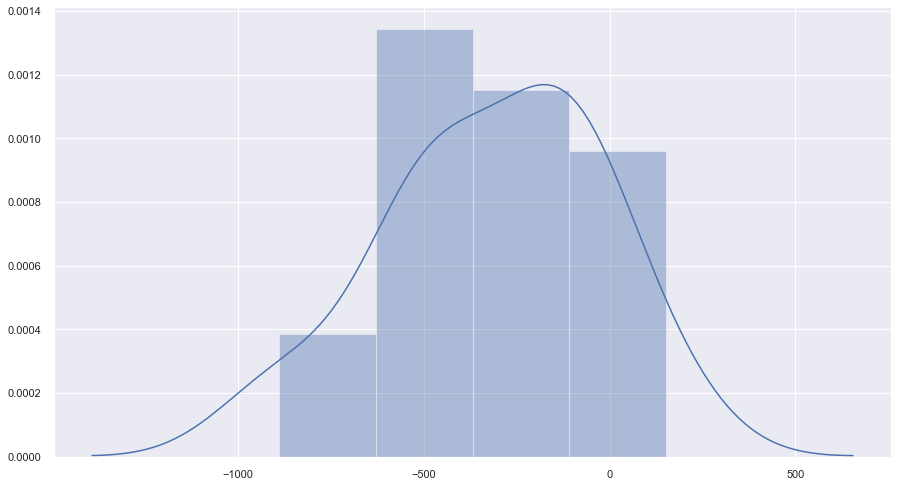

In [152]:
asd = []
for i in range(20):
    
    asd.append(np.cumsum(monte_longshot2_list[i])[-1])

print (np.mean(asd))
print (np.std(asd))

sns.distplot(asd)

# PCA t SNE

In [8]:
df = pd.read_csv('HORSES_AIDAN.csv')

df = pd.concat([df,pd.get_dummies(df.HORSE_RESULT)], axis = 1)
df = pd.concat([df,pd.get_dummies(df.SEX_TYPE)], axis = 1)

cols = sorted(df.columns.tolist())

for p in cols:
    try:
        df[p].fillna(0.0,inplace=True)
    except:
        pass

C:\Users\ivan\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (546) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [9]:
cols = ['ADJUSTED_RATING', 'AGE', 'AMT_BACKED_10_MINS_OUT', 'AMT_BACKED_1_MIN_OUT', 'AMT_BACKED_20_MINS_OUT',
 'AMT_BACKED_2_SECS_OUT', 'AMT_BACKED_30_MINS_OUT', 'AMT_BACKED_40_MINS_OUT', 'AMT_BACKED_45_MINS_OUT',
 'AMT_BACKED_5_MINS_OUT', 'AMT_BACKED_60_MINS_OUT', 'BACKPRICE', 'DAYS_SINCE_LAST_RUN', 'EXPERIENCE', 'EXPERIENCE_RANKING',
 'FORECASTPRICE_DENOMINATOR', 'FORECASTPRICE_NUMERATOR', 'HANDICAP', 'HORSE_RANKING_BY_PRICE',
 'LASTPRICETRADED', 'NUMBEROFACTIVERUNNERS', 'NUMBEROFRUNNERS', 'OFFICIAL_RATING', 'OFFICIAL_RATING_RANKING',
 'PMS_RANKING', 'PRICE_10_MINS_OUT', 'PRICE_10_MINS_OUT_RANKING',
 'PRICE_1_MIN_OUT', 'PRICE_1_MIN_OUT_RANKING', 'PRICE_20_MINS_OUT', 'PRICE_20_MINS_OUT_RANKING', 'PRICE_2_SECS_OUT',
 'PRICE_2_SECS_OUT_RANKING', 'PRICE_30_MINS_OUT', 'PRICE_30_MINS_OUT_RANKING', 'PRICE_40_MINS_OUT', 'PRICE_40_MINS_OUT_RANKING',
 'PRICE_45_MINS_OUT', 'PRICE_45_MINS_OUT_RANKING', 'PRICE_5_MINS_OUT', 'PRICE_5_MINS_OUT_RANKING', 'PRICE_60_MINS_OUT',
 'PRICE_60_MINS_OUT_RANKING', 'PRICE_MOVEMENT_SIGNIFICANCE', 'PRICE_RANKING_AT_RACE_START', 'PRODUCT_OF_ALL_RANKINGS',
 'PROD_OF_ALL_RANKINGS_RANKING', 'PROD_OF_NUM_SAMPLES_RANKINGS', 'PROD_SAMPLES_RANKINGS_RANKING', 'PROPENSITY',
 'PROPENSITY_RANKING', 'RACE_DISTANCE', 'SCORE_OF_RANKINGS', 'SCORE_OF_RANKINGS_RANKING',
 'SORT_PRIORITY', 'STALL_DRAW', 'SUM_OF_ALL_RANKINGS', 'SUM_OF_ALL_RANKINGS_RANKING',
 'SUM_OF_NUM_SAMPLES_RANKINGS', 'SUM_SAMPLES_RANKINGS_RANKING', 'TOTALAVAILABLE', 'TOTAL_MATCHED_ON_RACE',
 'TOTAL_MATCHED_ON_RUNNER', 'TOTAL_WLR', 'WEIGHT_VALUE',
 'WLR_RANKING', 'WLR_RANKINGS_RANKING', 'WLR_RANKINGS_TOTAL', 'C', 'F', 'G', 'H', 'M', 'R']

In [10]:
pca = PCA(n_components=3)
pca_result = pca.fit_transform(df[cols].values)
df['pca-one'] = pca_result[:,0]
df['pca-two'] = pca_result[:,1] 
df['pca-three'] = pca_result[:,2]
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))
#Explained variation per principal component: [0.09746116 0.07155445 0.06149531]

Explained variation per principal component: [1.00000000e+00 6.70839599e-56 5.07967823e-59]


In [12]:
# For reproducability of the results
np.random.seed(42)
rndperm = np.random.permutation(df.shape[0])

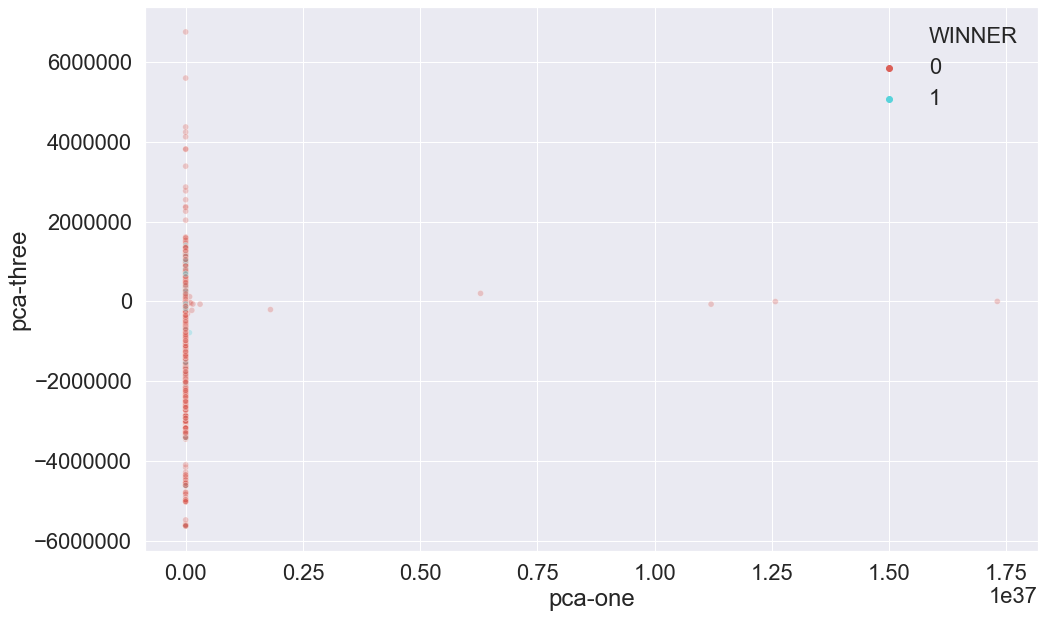

In [17]:
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="pca-one", y="pca-three",
    hue="WINNER",
    palette=sns.color_palette("hls", 2),
    data=df.loc[rndperm,:],
    legend="full",
    alpha=0.3
)

In [19]:
N = 10000
df_subset = df.loc[rndperm[:N],:].copy()
data_subset = df_subset[cols].values
pca = PCA(n_components=3)
pca_result = pca.fit_transform(data_subset)
df_subset['pca-one'] = pca_result[:,0]
df_subset['pca-two'] = pca_result[:,1] 
df_subset['pca-three'] = pca_result[:,2]
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

Explained variation per principal component: [1.00000000e+00 1.56975201e-56 8.01224224e-60]


In [20]:
time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(data_subset)
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.116s...
[t-SNE] Computed neighbors for 10000 samples in 7.669s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 15034.140880
[t-SNE] KL divergence after 250 iterations with early exaggeration: 75.491669
[t-SNE] KL divergence after 300 iterations: 2.442680
t-SNE done! Time elap

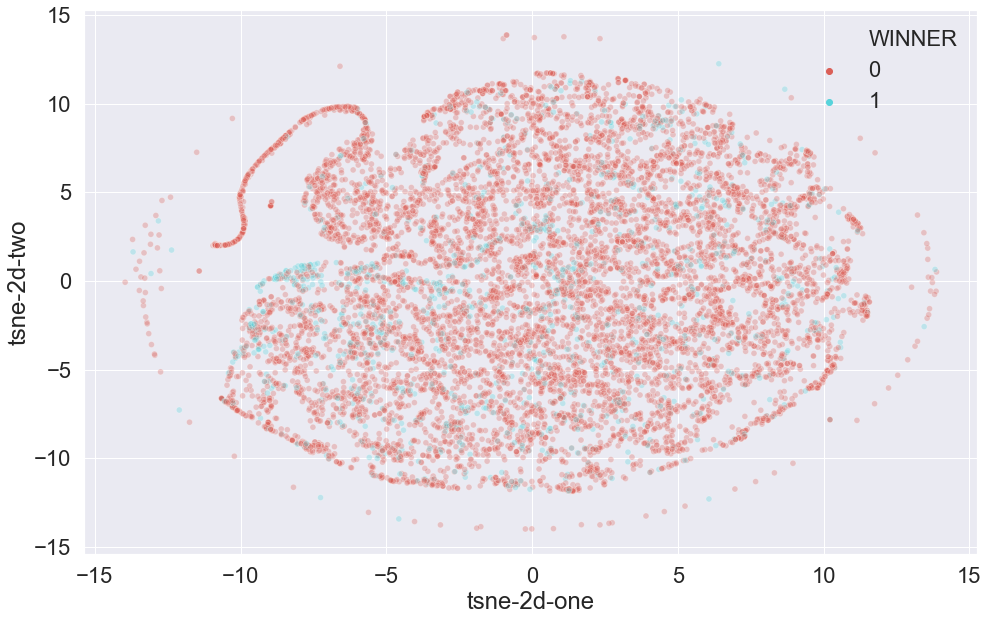

In [21]:
df_subset['tsne-2d-one'] = tsne_results[:,0]
df_subset['tsne-2d-two'] = tsne_results[:,1]
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="WINNER",
    palette=sns.color_palette("hls", 2),
    data=df_subset,
    legend="full",
    alpha=0.3
)

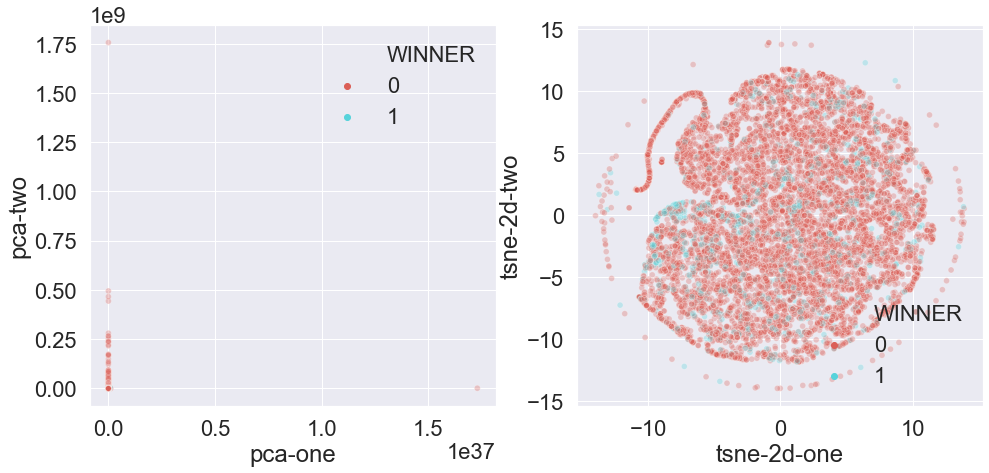

In [22]:
plt.figure(figsize=(16,7))
ax1 = plt.subplot(1, 2, 1)
sns.scatterplot(
    x="pca-one", y="pca-two",
    hue="WINNER",
    palette=sns.color_palette("hls", 2),
    data=df_subset,
    legend="full",
    alpha=0.3,
    ax=ax1
)
ax2 = plt.subplot(1, 2, 2)
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="WINNER",
    palette=sns.color_palette("hls", 2),
    data=df_subset,
    legend="full",
    alpha=0.3,
    ax=ax2
)

In [23]:
pca_50 = PCA(n_components=50)
pca_result_50 = pca_50.fit_transform(data_subset)
print('Cumulative explained variation for 50 principal components: {}'.format(np.sum(pca_50.explained_variance_ratio_)))

Cumulative explained variation for 50 principal components: 0.9999999999999981


In [24]:
time_start = time.time()
tsne = TSNE(n_components=2, verbose=0, perplexity=40, n_iter=300)
tsne_pca_results = tsne.fit_transform(pca_result_50)
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

t-SNE done! Time elapsed: 122.78690791130066 seconds


In [ ]:
df_subset['tsne-pca50-one'] = tsne_pca_results[:,0]
df_subset['tsne-pca50-two'] = tsne_pca_results[:,1]
plt.figure(figsize=(16,4))
ax1 = plt.subplot(1, 3, 1)

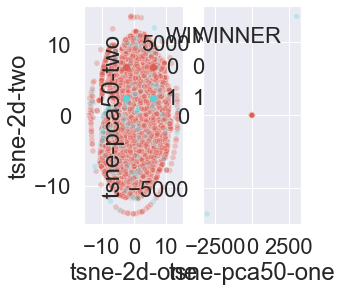

In [26]:
sns.scatterplot(
    x="pca-one", y="pca-two",
    hue="WINNER",
    palette=sns.color_palette("hls", 2),
    data=df_subset,
    legend="full",
    alpha=0.3,
    ax=ax1
)
ax2 = plt.subplot(1, 3, 2)
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="WINNER",
    palette=sns.color_palette("hls", 2),
    data=df_subset,
    legend="full",
    alpha=0.3,
    ax=ax2
)
ax3 = plt.subplot(1, 3, 3)
sns.scatterplot(
    x="tsne-pca50-one", y="tsne-pca50-two",
    hue="WINNER",
    palette=sns.color_palette("hls", 2),
    data=df_subset,
    legend="full",
    alpha=0.3,
    ax=ax3
)